In [2]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
#install.packages('survminer')

also installing the dependencies ‘bit’, ‘bit64’, ‘clipr’, ‘vroom’, ‘tzdb’, ‘rematch’, ‘prettyunits’, ‘matrixStats’, ‘RcppArmadillo’, ‘forcats’, ‘hms’, ‘readr’, ‘cellranger’, ‘progress’, ‘zip’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘foreign’, ‘haven’, ‘curl’, ‘readxl’, ‘openxlsx’, ‘boot’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘nnet’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘mime’, ‘bitops’, ‘nlme’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘colorspace’, ‘lattice’, ‘stringi’, ‘highr’, ‘markdown’, ‘yaml’, ‘xfun’, ‘RCurl’, ‘png’, ‘jpeg’, ‘xml2’, ‘gtable’, ‘isoband’, ‘MASS’, ‘mgcv’, ‘withr’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘farver’, ‘labeling’, ‘munsell’, ‘R6’, ‘RColorBrewer’, ‘viridisLite’, ‘Matrix’, ‘backports’, ‘generics’, ‘stringr’, ‘tidyselect’, ‘cpp11’, ‘knitr’, ‘KMsurv’, ‘data.table’, ‘zoo’, ‘km.ci’, ‘xtable’, ‘pkgconfig’, ‘gridtext’, ‘ggplot2’, ‘ggpubr’, ‘gridExtra’, ‘magrittr’, ‘maxstat’, ‘sca

In [1]:
library(org.Hs.eg.db)
library(limma)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(survival)
library(survminer)
library(gplots)
EG2SYM <- toTable(org.Hs.egSYMBOL)
extra_anno <- data.frame(gene_id=c(6890, 6891, 883, 56267, 7067, 7068),
                         symbol=c("ABCB2", "ABCB3", "CCBL1", "CCBL2", "THRCA", "THRCB"))
EG2SYM <- rbind(EG2SYM, extra_anno)

ENS2EG <- toTable(org.Hs.egENSEMBL2EG)
ENS2EG2SYM <- cbind.data.frame(EG2SYM, ENS2EG[match(EG2SYM$gene_id, ENS2EG$gene_id),])


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welco

In [2]:
brin_ADME_nodes <- read.csv(file="./data/Rosenthal_2019Pub_ADME List.txt", sep="\t", header=FALSE)
colnames(brin_ADME_nodes) <- "Sym"
brin_ADME_nodes$EGID <- ENS2EG2SYM$gene_id[match(brin_ADME_nodes$Sym, ENS2EG2SYM$symbol)]
brin_ADME_nodes$ENSID <- ENS2EG2SYM$ensembl_id[match(brin_ADME_nodes$Sym, ENS2EG2SYM$symbol)]
brin_ADME_nodes <- rbind.data.frame(brin_ADME_nodes[!is.na(brin_ADME_nodes$EGID),], 
                                    data.frame(Sym=c("CCN1","SLC49A4", "SLC49A3", "SLC35E2A", "NAA80"),
                                               EGID=c("3491", "84925","84179", "9906", "24142"),
                                               ENSID=c("ENSG00000142871", "ENSG00000138463", "ENSG00000169026", 
                                                       "ENSG00000215790", "ENSG00000243477"))) 

clin_data <- read.csv(file="./data/TCGA_RNASeq/clinical.tsv", 
                      sep="\t", header=TRUE, stringsAsFactors = FALSE)
clin_data3 <- clin_data[!duplicated(clin_data[,-c(152:154)]),]
clin_data_filt <- clin_data3[grep("TCGA", clin_data3$project_id),]
clin_data.l <- split(clin_data_filt, clin_data_filt$project_id)
all_SLC22_nodes.df <- all_SLC22_nodes_orig.df <- EG2SYM[grep("SLC22A", EG2SYM$symbol),]
 

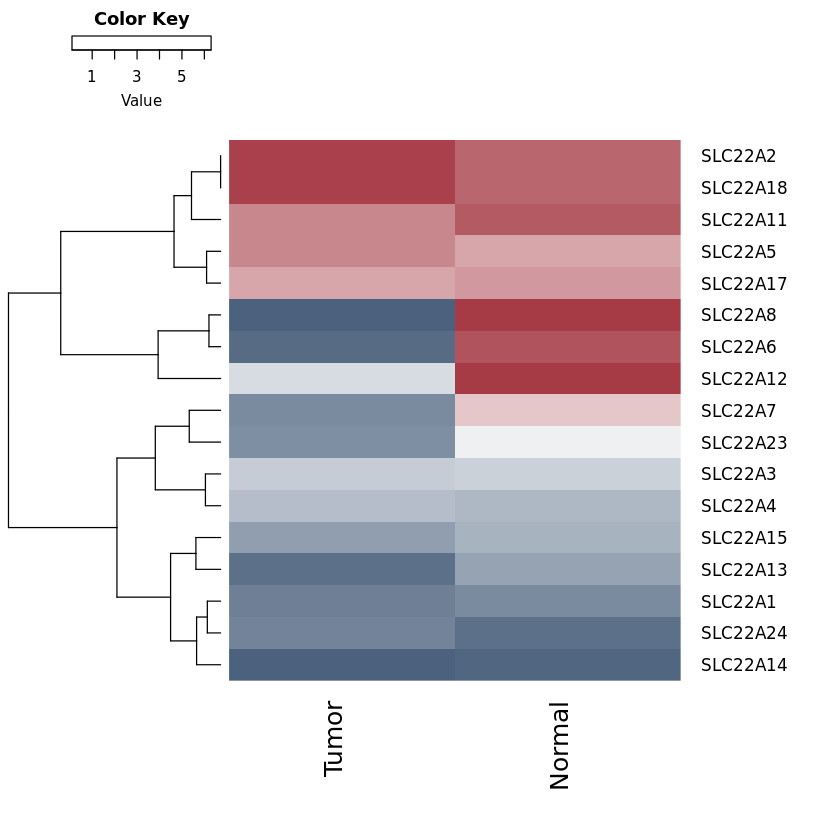

In [3]:
Tum_Norm_KIRC_KIRP <- read.table(file="./data/TCGA_KIRC_KIRP_TumorNormalSLC22geneExp.txt", sep="\t", header=TRUE)
Tum_Norm_KIRC <- Tum_Norm_KIRC_KIRP[,2:3]
Tum_Norm_KIRP <- Tum_Norm_KIRC_KIRP[,5:6]
rownames(Tum_Norm_KIRC) <- rownames(Tum_Norm_KIRP) <- Tum_Norm_KIRC_KIRP[,1]
mycol = colorpanel(1000, "#4B617D", "white", "#a63a45")
#pdf(file="Nigam_KIRP_SLC22_TumorNormalHeatmap_06252021.pdf", width=7, height=8)
#png(file="Nigam_KIRP_SLC22_TumorNormalHeatmap_06252021.png", width=7, height=8, res=300, units="in")
heatmap.2(as.matrix(Tum_Norm_KIRP), dendrogram="row", density.info="none", trace="none",
          labCol=c("Normal", "Tumor"), col=mycol, margin=c(8,8), lhei=c(2,10), cexCol=1.5)
#dev.off()


## KIRP

In [4]:
KIRP_data <- read.table(file="./data/TCGA_RNASeq/KIRP.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt", 
                        sep="\t", header=TRUE, stringsAsFactors = FALSE)
KIRP_data_rows <- KIRP_data[,1]
KIRP_data_rows_filt <- gsub("^\\?\\|","", KIRP_data_rows)
KIRP_data_rows_filt2 <- cbind.data.frame(symbol=unlist(lapply(strsplit(KIRP_data_rows_filt[-1], split="\\|"), 
                                                              function(x) ifelse(length(x) > 1, x[[1]], NA))), 
                                         gene_id=unlist(lapply(strsplit(KIRP_data_rows_filt[-1], split="\\|"), 
                                                               function(x) ifelse(length(x) > 1, x[[2]], x[[1]]))))

KIRP_sample_names <- colnames(KIRP_data[,-1])
KIRP_sample_names_filt <- unlist(lapply(strsplit(KIRP_sample_names, split="\\."), function(x) {
  paste(x[[1]], x[[2]], x[[3]], sep="-")
  }))


In [5]:
KIRP_data_tumor <- KIRP_data[-1,-1][, !unlist(lapply(strsplit(KIRP_sample_names, split="\\."), function(x) x[[4]])) %in% c("11A","05A")]

KIRP_data_tumor <- as.data.frame(apply(KIRP_data_tumor, 2, as.numeric))
rownames(KIRP_data_tumor) <- as.character(KIRP_data_rows_filt2$gene_id)
KIRP_data_tumor_rs <- rowSums(KIRP_data_tumor>75)
KIRP_data_tumor_thr <- ncol(KIRP_data_tumor)/2
KIRP_data_tumor_thrfilt <- KIRP_data_tumor[which(KIRP_data_tumor_rs > KIRP_data_tumor_thr),]
KIRP_data_rows_filt2b <- KIRP_data_rows_filt2[which(KIRP_data_tumor_rs > KIRP_data_tumor_thr),]
KIRP_data_tumor_log <- apply(KIRP_data_tumor_thrfilt, 2, function(x) log2(as.numeric(x) + 0.0001))
rownames(KIRP_data_tumor_log) <- rownames(KIRP_data_tumor_thrfilt)

KIRP_tumor_sample_names <- colnames(KIRP_data_tumor_log)
KIRP_tumor_sample_names_filt <- unlist(lapply(strsplit(KIRP_tumor_sample_names, split="\\."), function(x) {
  paste(x[[1]], x[[2]], x[[3]], sep="-")
}))
                             
KIRP_data_tumor_filt <- KIRP_data_tumor_thrfilt[,KIRP_tumor_sample_names_filt %in% clin_data3$case_submitter_id]
rownames(KIRP_data_tumor_filt) <- KIRP_data_rows_filt2b$gene_id
KIRP_tumor_filt_sample_names <- colnames(KIRP_data_tumor_filt)
KIRP_tumor_filt_sample_names_filt <- unlist(lapply(strsplit(KIRP_tumor_filt_sample_names, split="\\."), function(x) {
  paste(x[[1]], x[[2]], x[[3]], sep="-")
}))
                             
KIRP_data_tumor_rs_orig <- rowSums(KIRP_data_tumor>01)
KIRP_data_rows_filt_orig <- KIRP_data_rows_filt2[which(KIRP_data_tumor_rs_orig > KIRP_data_tumor_thr),]
KIRP_data_tumor_thrfilt_orig <- KIRP_data_tumor[which(KIRP_data_tumor_rs_orig > KIRP_data_tumor_thr),]
KIRP_data_tumor_filt_orig <- KIRP_data_tumor_thrfilt_orig[,KIRP_tumor_sample_names_filt %in% clin_data3$case_submitter_id]
rownames(KIRP_data_tumor_filt_orig) <- KIRP_data_rows_filt_orig$gene_id

In [6]:
KIRP_clin_data_tumor_filt <- clin_data3[match(KIRP_tumor_filt_sample_names_filt, clin_data3$case_submitter_id),]
KIRP_clin_data_tumor_filt$ajcc_pathologic_m <- factor(as.character(KIRP_clin_data_tumor_filt$ajcc_pathologic_m),
                                                      levels=c("'--", "MX", "M0", "M1"))
KIRP_clin_data_tumor_filt$ajcc_pathologic_n <- factor(as.character(KIRP_clin_data_tumor_filt$ajcc_pathologic_n),
                                                      levels=c("'--", "NX", "N0", "N1"))
KIRP_clin_data_tumor_filt$ajcc_pathologic_stage <- factor(gsub(" ", "", as.character(KIRP_clin_data_tumor_filt$ajcc_pathologic_stage)),
                                                          levels=c("'--", "StageI", "StageII", "StageIII", "StageIV"))
KIRP_clin_data_tumor_filt$ajcc_pathologic_t <- factor(gsub("T3c", "T4", as.character(KIRP_clin_data_tumor_filt$ajcc_pathologic_t)),
                                                      levels=c("TX", "T1", "T1a","T1b", "T2", "T2a", "T2b",
                                                               "T3", "T3a","T3b", "T3c","T4"))
KIRP_clin_data_tumor_filt$race <- factor(gsub(" ", "_", gsub("american indian or alaska native", "indig", 
                                                             gsub("black or african american", "black", 
                                                                  as.character(KIRP_clin_data_tumor_filt$race)))), 
                                         levels=c("indig", "asian", "black", "not_reported", "white"))
KIRP_clin_data_tumor_filt$gender <- factor(as.character(KIRP_clin_data_tumor_filt$gender), 
                                         levels=c("male", "female"))
KIRP_clin_data_tumor_filt$age_at_index <- as.numeric(KIRP_clin_data_tumor_filt$age_at_index)
KIRP_data_tumor_filt_m <- KIRP_data_tumor_filt[,!KIRP_clin_data_tumor_filt$ajcc_pathologic_m %in% c(NA, "'--")]
KIRP_clin_data_tumor_filt_m <- subset(KIRP_clin_data_tumor_filt, ajcc_pathologic_m != "'--")
KIRP_clin_data_tumor_filt_m <- droplevels(KIRP_clin_data_tumor_filt_m)
KIRP_design_m <- model.matrix(~0 + KIRP_clin_data_tumor_filt_m$ajcc_pathologic_m)
KIRP_voom_m <- KIRP_voom <- voom(as.matrix(KIRP_data_tumor_filt_m), KIRP_design_m, plot=FALSE)

KIRP_data_tumor_filt_n <- KIRP_data_tumor_filt[,!KIRP_clin_data_tumor_filt$ajcc_pathologic_n %in% c(NA, "'--")]
KIRP_clin_data_tumor_filt_n <- subset(KIRP_clin_data_tumor_filt, ajcc_pathologic_n != NA | ajcc_pathologic_n != "'--")
KIRP_clin_data_tumor_filt_n <- droplevels(KIRP_clin_data_tumor_filt_n)
KIRP_design_n <- model.matrix(~0 + KIRP_clin_data_tumor_filt_n$ajcc_pathologic_n)
KIRP_voom_n <- voom(as.matrix(KIRP_data_tumor_filt_n), KIRP_design_n, plot = FALSE)

KIRP_data_tumor_filt_stage <- KIRP_data_tumor_filt[,!KIRP_clin_data_tumor_filt$ajcc_pathologic_stage %in% c(NA, "'--")]
KIRP_clin_data_tumor_filt_stage <- subset(KIRP_clin_data_tumor_filt, ajcc_pathologic_stage != "'--" | ajcc_pathologic_stage != NA)
KIRP_clin_data_tumor_filt_stage <- droplevels(KIRP_clin_data_tumor_filt_stage)
KIRP_design_stage <- model.matrix(~0 + KIRP_clin_data_tumor_filt_stage$ajcc_pathologic_stage)
KIRP_voom_stage <- voom(as.matrix(KIRP_data_tumor_filt_stage), KIRP_design_stage, plot = FALSE)

KIRP_data_tumor_filt_t <- KIRP_data_tumor_filt[,!KIRP_clin_data_tumor_filt$ajcc_pathologic_t %in% c(NA, "'--", "T3c")]
KIRP_clin_data_tumor_filt_t <- subset(KIRP_clin_data_tumor_filt, ajcc_pathologic_t != "T3c")
KIRP_clin_data_tumor_filt_t <- droplevels(KIRP_clin_data_tumor_filt_t)
KIRP_design_t <- model.matrix(~0 + KIRP_clin_data_tumor_filt_t$ajcc_pathologic_t)
KIRP_voom_t <- voom(as.matrix(KIRP_data_tumor_filt_t), KIRP_design_t, plot = FALSE)



Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [7]:
## with Race, Gender, & Age
KIRP_filt_age <- which(is.na(KIRP_clin_data_tumor_filt$age_at_index))
KIRP_data_tumor_filt_age <- KIRP_data_tumor_filt[,-KIRP_filt_age]
KIRP_clin_data_tumor_filt_age <- KIRP_clin_data_tumor_filt[-KIRP_filt_age,]

KIRP_data_tumor_filt_age <- KIRP_data_tumor_filt_age
KIRP_clin_data_tumor_filt_race_age_gen <- KIRP_clin_data_tumor_filt_age
KIRP_clin_data_tumor_filt_race_age_gen <- droplevels(KIRP_clin_data_tumor_filt_race_age_gen)
KIRP_design_race_age_gen <- model.matrix(~0 + race + age_at_index + gender, 
                                   data=KIRP_clin_data_tumor_filt_race_age_gen)
KIRP_voom_race_age_gen <- voom(as.matrix(KIRP_data_tumor_filt_age), KIRP_design_race_age_gen, plot=FALSE)


KIRP_filt_all_m <- unique(c(which(KIRP_clin_data_tumor_filt$ajcc_pathologic_m %in% c(NA, "'--")), 
                            which(is.na(KIRP_clin_data_tumor_filt$age_at_index))))
KIRP_data_tumor_filt_all_m <- KIRP_data_tumor_filt[,-KIRP_filt_all_m]
KIRP_clin_data_tumor_filt_all_m <-KIRP_clin_data_tumor_filt[-KIRP_filt_all_m,]
KIRP_clin_data_tumor_filt_all_m <- droplevels(KIRP_clin_data_tumor_filt_all_m)
KIRP_design_all_m <- model.matrix(~0 + ajcc_pathologic_m + age_at_index + gender + race, data=KIRP_clin_data_tumor_filt_all_m)
KIRP_voom_all_m <- voom(as.matrix(KIRP_data_tumor_filt_all_m), KIRP_design_all_m)

KIRP_filt_all_n <- unique(c(which(KIRP_clin_data_tumor_filt$ajcc_pathologic_n %in% c(NA, "'--")), 
                            which(is.na(KIRP_clin_data_tumor_filt$age_at_index))))
KIRP_data_tumor_filt_all_n <- KIRP_data_tumor_filt[,-KIRP_filt_all_n]
KIRP_clin_data_tumor_filt_all_n <-KIRP_clin_data_tumor_filt[-KIRP_filt_all_n,]
KIRP_clin_data_tumor_filt_all_n <- droplevels(KIRP_clin_data_tumor_filt_all_n)
KIRP_design_all_n <- model.matrix(~0 + ajcc_pathologic_n + age_at_index + gender + race, data=KIRP_clin_data_tumor_filt_all_n)
KIRP_voom_all_n <- voom(as.matrix(KIRP_data_tumor_filt_all_n), KIRP_design_all_n)

KIRP_filt_all_stage <- unique(c(which(KIRP_clin_data_tumor_filt$ajcc_pathologic_stage %in% c(NA, "'--")), 
                            which(is.na(KIRP_clin_data_tumor_filt$age_at_index))))
KIRP_data_tumor_filt_all_stage <- KIRP_data_tumor_filt[,-KIRP_filt_all_stage]
KIRP_clin_data_tumor_filt_all_stage <-KIRP_clin_data_tumor_filt[-KIRP_filt_all_stage,]
KIRP_clin_data_tumor_filt_all_stage <- droplevels(KIRP_clin_data_tumor_filt_all_stage)
KIRP_design_all_stage <- model.matrix(~0 + ajcc_pathologic_stage + age_at_index + gender + race, data=KIRP_clin_data_tumor_filt_all_stage)
KIRP_voom_all_stage <- voom(as.matrix(KIRP_data_tumor_filt_all_stage), KIRP_design_all_stage)

KIRP_filt_all_t <- unique(c(which(KIRP_clin_data_tumor_filt$ajcc_pathologic_t %in% c(NA, "'--", "T3C")), 
                            which(is.na(KIRP_clin_data_tumor_filt$age_at_index))))
KIRP_data_tumor_filt_all_t <- KIRP_data_tumor_filt[,-KIRP_filt_all_t]
KIRP_clin_data_tumor_filt_all_t <-KIRP_clin_data_tumor_filt[-KIRP_filt_all_t,]
KIRP_clin_data_tumor_filt_all_t <- droplevels(KIRP_clin_data_tumor_filt_all_t)
KIRP_design_all_t <- model.matrix(~0 + ajcc_pathologic_t + age_at_index, data=KIRP_clin_data_tumor_filt_all_t)
KIRP_voom_all_t <- voom(as.matrix(KIRP_data_tumor_filt_all_t), KIRP_design_all_t)

KIRP_filt_race_age_gen_tx <- unique(c(KIRP_clin_data_tumor_filt$treatment_type %in% c(NA, "'--"),
        which(is.na(KIRP_clin_data_tumor_filt$age_at_index))))
KIRP_data_tumor_filt_tx <- KIRP_data_tumor_filt[,-KIRP_filt_race_age_gen_tx]
KIRP_clin_data_tumor_filt_tx <- KIRP_clin_data_tumor_filt[-KIRP_filt_race_age_gen_tx,]
KIRP_design_race_age_gen_tx <- model.matrix(~0 + treatment_type + race + age_at_index + gender, 
                                            data=KIRP_clin_data_tumor_filt_tx)
KIRP_voom_race_age_gen_tx <- voom(as.matrix(KIRP_data_tumor_filt_tx), KIRP_design_race_age_gen_tx, plot=FALSE)

KIRP_filt_race_age_gen_priMalig <- unique(c(KIRP_clin_data_tumor_filt$prior_malignancy %in% c(NA, "'--"),
                                            which(is.na(KIRP_clin_data_tumor_filt$age_at_index))))
KIRP_data_tumor_filt_priMalig <- KIRP_data_tumor_filt[,-KIRP_filt_race_age_gen_priMalig]
KIRP_clin_data_tumor_filt_priMalig <- KIRP_clin_data_tumor_filt[-KIRP_filt_race_age_gen_priMalig,]
KIRP_design_race_age_gen_priMalig <- model.matrix(~0 + prior_malignancy + race + age_at_index + gender, 
                                                  data=KIRP_clin_data_tumor_filt_priMalig)
KIRP_voom_race_age_gen_priMalig <- voom(as.matrix(KIRP_data_tumor_filt_priMalig), KIRP_design_race_age_gen_priMalig, plot=FALSE)


In [8]:
all_SLC22_KIRP_nodes.df <- all_SLC22_nodes.df.filt <- SLC22_nodes_KIRP_exp <- all_SLC22_nodes.df[all_SLC22_nodes.df$gene_id %in% rownames(KIRP_voom_m$E),]

all_SLC22_nodes_KIRP.df.filt <- all_SLC22_nodes.df[which(all_SLC22_nodes.df$symbol %in% c("SLC22A2", "SLC22A3", "SLC22A4",
                                                        "SLC22A5", "SLC22A6", "SLC22A7", "SLC22A8", "SLC22A1", "SLC22A11", 
                                                        "SLC22A12", "SLC22A13", "SLC22A14", "SLC22A15", "SLC22A17", 
                                                        "SLC22A18", "SLC22A23", "SLC22A24")),]
head(all_SLC22_nodes_KIRP.df.filt)
KIRP_data_tumor_filt_orig_m <- KIRP_data_tumor_filt_orig[,!KIRP_clin_data_tumor_filt$ajcc_pathologic_m %in% c(NA, "'--")]
KIRP_voom_orig <- voom(as.matrix(KIRP_data_tumor_filt_orig_m), KIRP_design_m, plot=FALSE)

SLC22_nodes_KIRP_exp_orig <- all_SLC22_nodes.df[all_SLC22_nodes.df$gene_id %in% rownames(KIRP_voom_orig$E),]
SLC22_nodes_KIRP_exp <- all_SLC22_nodes.df[all_SLC22_nodes.df$gene_id %in% rownames(KIRP_voom_m$E),]

,gene_id,symbol
,<chr>,<chr>
3938,5002,SLC22A18
5226,6580,SLC22A1
5227,6581,SLC22A3
5228,6582,SLC22A2
5229,6583,SLC22A4
5230,6584,SLC22A5


In [9]:
## with Race, Gender, & Age
colnames(KIRP_design_all_m) <- gsub("ajcc_pathologic_m|^race|^gender","", colnames(KIRP_design_all_m))
KIRP_contrasts_all_m <- makeContrasts(M1 - M0, levels=KIRP_design_all_m)
colnames(KIRP_design_all_n) <- gsub("ajcc_pathologic_n|^race|^gender","", colnames(KIRP_design_all_n))
KIRP_contrasts_all_n <- makeContrasts(N1 - N0, levels=KIRP_design_all_n)
colnames(KIRP_design_all_stage) <- gsub("ajcc_pathologic_stage|^race|^gender","", colnames(KIRP_design_all_stage))
KIRP_contrasts_all_stage <- makeContrasts(StageII - StageI, StageIII - StageII, 
                                           StageIV - StageIII, levels=KIRP_design_all_stage)
colnames(KIRP_design_all_t) <- gsub("ajcc_pathologic_t|^race|^gender","", colnames(KIRP_design_all_t))
KIRP_contrasts_all_t <- makeContrasts((T2 + T2a + T2b)/3 -  (T1 + T1a + T1b)/3, (T3 + T3a + T3b)/3 - (T2 + T2a + T2b)/3, 
                                       T4-(T3 + T3a + T3b)/3, levels=KIRP_design_all_t)

KIRP_data_tumor_filt_race_age_gen <- KIRP_data_tumor_filt[,colnames(KIRP_data_tumor_filt)]
KIRP_clin_data_tumor_filt_race_age_gen <- KIRP_clin_data_tumor_filt[rownames(KIRP_clin_data_tumor_filt) %in% 
                                                                    rownames(KIRP_design_race_age_gen),]
KIRP_data_tumor_filt_race_age_gen <- KIRP_data_tumor_filt[,unlist(sapply(KIRP_clin_data_tumor_filt_race_age_gen$case_submitter_id, 
                                        function(x) grep(gsub("-", ".", x), colnames(KIRP_data_tumor_filt))))]
KIRP_design_race_age_gen <- model.matrix(~0 + race + age_at_index + gender, 
                                   data=KIRP_clin_data_tumor_filt_race_age_gen)
KIRP_voom_race_age_gen <- voom(as.matrix(KIRP_data_tumor_filt_race_age_gen), KIRP_design_race_age_gen, plot=FALSE)

KIRP_race_age_gen_m_fit <- lmFit(KIRP_voom_all_m, KIRP_design_all_m)
KIRP_race_age_gen_m_fit <- contrasts.fit(KIRP_race_age_gen_m_fit, contrasts=KIRP_contrasts_all_m)
KIRP_race_age_gen_m_efit <- eBayes(KIRP_race_age_gen_m_fit)
KIRP_race_age_gen_m_topTable <- topTable(KIRP_race_age_gen_m_efit, coef=1, n=Inf)
KIRP_race_age_gen_m_topTable_SLC22 <- KIRP_race_age_gen_m_topTable[rownames(KIRP_race_age_gen_m_topTable) %in% as.character(all_SLC22_KIRP_nodes.df$gene_id),]
KIRP_race_age_gen_m_topTable_SLC22$Symbol <- all_SLC22_KIRP_nodes.df$symbol[match(rownames(KIRP_race_age_gen_m_topTable_SLC22), all_SLC22_KIRP_nodes.df$gene_id)]
KIRP_race_age_gen_m_topTable_ADME <- KIRP_race_age_gen_m_topTable[rownames(KIRP_race_age_gen_m_topTable) %in% as.character(brin_ADME_nodes$EGID),]
KIRP_race_age_gen_m_topTable_ADME$Symbol <- brin_ADME_nodes$Sym[match(rownames(KIRP_race_age_gen_m_topTable_ADME), brin_ADME_nodes$EGID)]

KIRP_race_age_gen_n_fit <- lmFit(KIRP_voom_all_n, KIRP_design_all_n)
KIRP_race_age_gen_n_fit <- contrasts.fit(KIRP_race_age_gen_n_fit, contrasts=KIRP_contrasts_all_n)
KIRP_race_age_gen_n_efit <- eBayes(KIRP_race_age_gen_n_fit)
KIRP_race_age_gen_n_topTable <- topTable(KIRP_race_age_gen_n_efit, coef=1, n=Inf)
KIRP_race_age_gen_n_topTable_SLC22 <- KIRP_race_age_gen_n_topTable[rownames(KIRP_race_age_gen_n_topTable) %in% as.character(all_SLC22_KIRP_nodes.df$gene_id),]
KIRP_race_age_gen_n_topTable_SLC22$Symbol <- all_SLC22_KIRP_nodes.df$symbol[match(rownames(KIRP_race_age_gen_n_topTable_SLC22), all_SLC22_KIRP_nodes.df$gene_id)]
KIRP_race_age_gen_n_topTable_ADME <- KIRP_race_age_gen_n_topTable[rownames(KIRP_race_age_gen_n_topTable) %in% as.character(brin_ADME_nodes$EGID),]
KIRP_race_age_gen_n_topTable_ADME$Symbol <- brin_ADME_nodes$Sym[match(rownames(KIRP_race_age_gen_n_topTable_ADME), brin_ADME_nodes$EGID)]

KIRP_race_age_gen_stage_fit <- lmFit(KIRP_voom_all_stage, KIRP_design_all_stage)
KIRP_race_age_gen_stage_fit <- contrasts.fit(KIRP_race_age_gen_stage_fit, contrasts=KIRP_contrasts_all_stage)
KIRP_race_age_gen_stage_efit <- eBayes(KIRP_race_age_gen_stage_fit)
KIRP_race_age_gen_stage_topTable_1v2 <- topTable(KIRP_race_age_gen_stage_efit, coef=1, n=Inf)
KIRP_race_age_gen_stage_topTable_1v2_SLC22 <- KIRP_race_age_gen_stage_topTable_1v2[rownames(KIRP_race_age_gen_stage_topTable_1v2) %in% as.character(all_SLC22_KIRP_nodes.df$gene_id),]
KIRP_race_age_gen_stage_topTable_1v2_SLC22$Symbol <- all_SLC22_KIRP_nodes.df$symbol[match(rownames(KIRP_race_age_gen_stage_topTable_1v2_SLC22), all_SLC22_KIRP_nodes.df$gene_id)]
KIRP_race_age_gen_stage_topTable_1v2_ADME <- KIRP_race_age_gen_stage_topTable_1v2[rownames(KIRP_race_age_gen_stage_topTable_1v2) %in% as.character(brin_ADME_nodes$EGID),]
KIRP_race_age_gen_stage_topTable_1v2_ADME$Symbol <- brin_ADME_nodes$Sym[match(rownames(KIRP_race_age_gen_stage_topTable_1v2_ADME), brin_ADME_nodes$EGID)]

KIRP_race_age_gen_stage_topTable_2v3 <- topTable(KIRP_race_age_gen_stage_efit, coef=2, n=Inf)
KIRP_race_age_gen_stage_topTable_2v3_SLC22 <- KIRP_race_age_gen_stage_topTable_2v3[rownames(KIRP_race_age_gen_stage_topTable_2v3) %in% as.character(all_SLC22_KIRP_nodes.df$gene_id),]
KIRP_race_age_gen_stage_topTable_2v3_SLC22$Symbol <- all_SLC22_KIRP_nodes.df$symbol[match(rownames(KIRP_race_age_gen_stage_topTable_2v3_SLC22), all_SLC22_KIRP_nodes.df$gene_id)]
KIRP_race_age_gen_stage_topTable_2v3_ADME <- KIRP_race_age_gen_stage_topTable_2v3[rownames(KIRP_race_age_gen_stage_topTable_2v3) %in% as.character(brin_ADME_nodes$EGID),]
KIRP_race_age_gen_stage_topTable_2v3_ADME$Symbol <- brin_ADME_nodes$Sym[match(rownames(KIRP_race_age_gen_stage_topTable_2v3_ADME), brin_ADME_nodes$EGID)]

KIRP_race_age_gen_stage_topTable_3v4 <- topTable(KIRP_race_age_gen_stage_efit, coef=3, n=Inf)
KIRP_race_age_gen_stage_topTable_3v4_SLC22 <- KIRP_race_age_gen_stage_topTable_3v4[rownames(KIRP_race_age_gen_stage_topTable_3v4) %in% as.character(all_SLC22_KIRP_nodes.df$gene_id),]
KIRP_race_age_gen_stage_topTable_3v4_SLC22$Symbol <- all_SLC22_KIRP_nodes.df$symbol[match(rownames(KIRP_race_age_gen_stage_topTable_3v4_SLC22), all_SLC22_KIRP_nodes.df$gene_id)]
KIRP_race_age_gen_stage_topTable_3v4_ADME <- KIRP_race_age_gen_stage_topTable_3v4[rownames(KIRP_race_age_gen_stage_topTable_3v4) %in% as.character(brin_ADME_nodes$EGID),]
KIRP_race_age_gen_stage_topTable_3v4_ADME$Symbol <- brin_ADME_nodes$Sym[match(rownames(KIRP_race_age_gen_stage_topTable_3v4_ADME), brin_ADME_nodes$EGID)]

KIRP_race_age_gen_t_fit <- lmFit(KIRP_voom_all_t, KIRP_design_all_t)
KIRP_race_age_gen_t_fit <- contrasts.fit(KIRP_race_age_gen_t_fit, contrasts=KIRP_contrasts_all_t)
KIRP_race_age_gen_t_efit <- eBayes(KIRP_race_age_gen_t_fit)
KIRP_race_age_gen_t_topTable_1v2 <- topTable(KIRP_race_age_gen_t_efit, coef=1, n=Inf)
KIRP_race_age_gen_t_topTable_1v2_SLC22 <- KIRP_race_age_gen_t_topTable_1v2[rownames(KIRP_race_age_gen_t_topTable_1v2) %in% as.character(all_SLC22_KIRP_nodes.df$gene_id),]
KIRP_race_age_gen_t_topTable_1v2_SLC22$Symbol <- all_SLC22_KIRP_nodes.df$symbol[match(rownames(KIRP_race_age_gen_t_topTable_1v2_SLC22), all_SLC22_KIRP_nodes.df$gene_id)]
KIRP_race_age_gen_t_topTable_1v2_ADME <- KIRP_race_age_gen_t_topTable_1v2[rownames(KIRP_race_age_gen_t_topTable_1v2) %in% as.character(brin_ADME_nodes$EGID),]
KIRP_race_age_gen_t_topTable_1v2_ADME$Symbol <- brin_ADME_nodes$Sym[match(rownames(KIRP_race_age_gen_t_topTable_1v2_ADME), brin_ADME_nodes$EGID)]

KIRP_race_age_gen_t_topTable_2v3 <- topTable(KIRP_race_age_gen_t_efit, coef=2, n=Inf)
KIRP_race_age_gen_t_topTable_2v3_SLC22 <- KIRP_race_age_gen_t_topTable_2v3[rownames(KIRP_race_age_gen_t_topTable_2v3) %in% as.character(all_SLC22_KIRP_nodes.df$gene_id),]
KIRP_race_age_gen_t_topTable_2v3_SLC22$Symbol <- all_SLC22_KIRP_nodes.df$symbol[match(rownames(KIRP_race_age_gen_t_topTable_2v3_SLC22), all_SLC22_KIRP_nodes.df$gene_id)]
KIRP_race_age_gen_t_topTable_2v3_ADME <- KIRP_race_age_gen_t_topTable_2v3[rownames(KIRP_race_age_gen_t_topTable_2v3) %in% as.character(brin_ADME_nodes$EGID),]
KIRP_race_age_gen_t_topTable_2v3_ADME$Symbol <- brin_ADME_nodes$Sym[match(rownames(KIRP_race_age_gen_t_topTable_2v3_ADME), brin_ADME_nodes$EGID)]

KIRP_race_age_gen_t_topTable_3v4 <- topTable(KIRP_race_age_gen_t_efit, coef=3, n=Inf)
KIRP_race_age_gen_t_topTable_3v4_SLC22 <- KIRP_race_age_gen_t_topTable_3v4[rownames(KIRP_race_age_gen_t_topTable_3v4) %in% as.character(all_SLC22_KIRP_nodes.df$gene_id),]
KIRP_race_age_gen_t_topTable_3v4_SLC22$Symbol <- all_SLC22_KIRP_nodes.df$symbol[match(rownames(KIRP_race_age_gen_t_topTable_3v4_SLC22), all_SLC22_KIRP_nodes.df$gene_id)]
KIRP_race_age_gen_t_topTable_3v4_ADME <- KIRP_race_age_gen_t_topTable_3v4[rownames(KIRP_race_age_gen_t_topTable_3v4) %in% as.character(brin_ADME_nodes$EGID),]
KIRP_race_age_gen_t_topTable_3v4_ADME$Symbol <- brin_ADME_nodes$Sym[match(rownames(KIRP_race_age_gen_t_topTable_3v4_ADME), brin_ADME_nodes$EGID)]


In [10]:
colnames(KIRP_design_race_age_gen_tx) <- gsub("treatment_type","",
                                            gsub(" ","", gsub(", NOS","", colnames(KIRP_design_race_age_gen_tx))))
KIRP_contrasts_race_age_gen_tx <- makeContrasts(PharmaceuticalTherapy - RadiationTherapy, levels=KIRP_design_race_age_gen_tx)

KIRP_race_age_gen_tx_fit <- lmFit(KIRP_voom_race_age_gen_tx, KIRP_design_race_age_gen_tx)
KIRP_race_age_gen_tx_fit <- contrasts.fit(KIRP_race_age_gen_tx_fit, contrasts=KIRP_contrasts_race_age_gen_tx)
KIRP_race_age_gen_tx_efit <- eBayes(KIRP_race_age_gen_tx_fit)
KIRP_race_age_gen_tx_topTable <- topTable(KIRP_race_age_gen_tx_efit, coef=1, n=Inf)
KIRP_race_age_gen_tx_topTable_SLC22 <- KIRP_race_age_gen_tx_topTable[rownames(KIRP_race_age_gen_tx_topTable) %in% as.character(all_SLC22_KIRP_nodes.df$gene_id),]
KIRP_race_age_gen_tx_topTable_SLC22$Symbol <- all_SLC22_KIRP_nodes.df$symbol[match(rownames(KIRP_race_age_gen_tx_topTable_SLC22), all_SLC22_KIRP_nodes.df$gene_id)]
KIRP_race_age_gen_tx_topTable_ADME <- KIRP_race_age_gen_tx_topTable[rownames(KIRP_race_age_gen_tx_topTable) %in% as.character(brin_ADME_nodes$EGID),]
KIRP_race_age_gen_tx_topTable_ADME$Symbol <- brin_ADME_nodes$Sym[match(rownames(KIRP_race_age_gen_tx_topTable_ADME), brin_ADME_nodes$EGID)]


In [11]:
colnames(KIRP_design_race_age_gen_priMalig) <- gsub("prior_malignancy","",
                                            gsub(" ","",colnames(KIRP_design_race_age_gen_priMalig)))
KIRP_contrasts_race_age_gen_priMalig <- makeContrasts(yes - no, levels=KIRP_design_race_age_gen_priMalig)

KIRP_race_age_gen_priMalig_fit <- lmFit(KIRP_voom_race_age_gen_priMalig, KIRP_design_race_age_gen_priMalig)
KIRP_race_age_gen_priMalig_fit <- contrasts.fit(KIRP_race_age_gen_priMalig_fit, contrasts=KIRP_contrasts_race_age_gen_priMalig)
KIRP_race_age_gen_priMalig_efit <- eBayes(KIRP_race_age_gen_priMalig_fit)
KIRP_race_age_gen_priMalig_topTable <- topTable(KIRP_race_age_gen_priMalig_efit, coef=1, n=Inf)
KIRP_race_age_gen_priMalig_topTable_SLC22 <- KIRP_race_age_gen_priMalig_topTable[rownames(KIRP_race_age_gen_priMalig_topTable) %in% as.character(all_SLC22_KIRP_nodes.df$gene_id),]
KIRP_race_age_gen_priMalig_topTable_SLC22$Symbol <- all_SLC22_KIRP_nodes.df$symbol[match(rownames(KIRP_race_age_gen_priMalig_topTable_SLC22), all_SLC22_KIRP_nodes.df$gene_id)]
KIRP_race_age_gen_priMalig_topTable_ADME <- KIRP_race_age_gen_priMalig_topTable[rownames(KIRP_race_age_gen_priMalig_topTable) %in% as.character(brin_ADME_nodes$EGID),]
KIRP_race_age_gen_priMalig_topTable_ADME$Symbol <- brin_ADME_nodes$Sym[match(rownames(KIRP_race_age_gen_priMalig_topTable_ADME), brin_ADME_nodes$EGID)]


In [12]:
message("DE Genes - ajcc_pathologic_m")
table(KIRP_race_age_gen_m_topTable$adj.P.Val < 0.1)
table(KIRP_race_age_gen_m_topTable_SLC22$adj.P.Val < 0.1)
table(KIRP_race_age_gen_m_topTable_ADME$adj.P.Val < 0.1)
message("DE Genes - ajcc_pathologic_n")
table(KIRP_race_age_gen_n_topTable$adj.P.Val < 0.1)
table(KIRP_race_age_gen_n_topTable_SLC22$adj.P.Val < 0.1)
table(KIRP_race_age_gen_n_topTable_ADME$adj.P.Val < 0.1)

message("DE Genes - ajcc_pathologic_stage - 1v2")
table(KIRP_race_age_gen_stage_topTable_1v2$adj.P.Val < 0.1)
table(KIRP_race_age_gen_stage_topTable_1v2_SLC22$adj.P.Val < 0.1)
table(KIRP_race_age_gen_stage_topTable_1v2_ADME$adj.P.Val < 0.1)
message("DE Genes - ajcc_pathologic_stage - 2v3")
table(KIRP_race_age_gen_stage_topTable_2v3$adj.P.Val < 0.1)
table(KIRP_race_age_gen_stage_topTable_2v3_SLC22$adj.P.Val < 0.1)
table(KIRP_race_age_gen_stage_topTable_2v3_ADME$adj.P.Val < 0.1)
message("DE Genes - ajcc_pathologic_stage - 3v4")
table(KIRP_race_age_gen_stage_topTable_3v4$adj.P.Val < 0.1)
table(KIRP_race_age_gen_stage_topTable_3v4_SLC22$adj.P.Val < 0.1)
table(KIRP_race_age_gen_stage_topTable_3v4_ADME$adj.P.Val < 0.1)

message("DE Genes - ajcc_pathologic_t - 1v2")
table(KIRP_race_age_gen_t_topTable_1v2$adj.P.Val < 0.1)
table(KIRP_race_age_gen_t_topTable_1v2_SLC22$adj.P.Val < 0.1)
table(KIRP_race_age_gen_t_topTable_1v2_ADME$adj.P.Val < 0.1)
message("DE Genes - ajcc_pathologic_t - 2v3")
table(KIRP_race_age_gen_t_topTable_2v3$adj.P.Val < 0.1)
table(KIRP_race_age_gen_t_topTable_2v3_SLC22$adj.P.Val < 0.1)
table(KIRP_race_age_gen_t_topTable_2v3_ADME$adj.P.Val < 0.1)
message("DE Genes - ajcc_pathologic_t - 3v4")
table(KIRP_race_age_gen_t_topTable_3v4$adj.P.Val < 0.1)
table(KIRP_race_age_gen_t_topTable_3v4_SLC22$adj.P.Val < 0.1)
table(KIRP_race_age_gen_t_topTable_3v4_ADME$adj.P.Val < 0.1)

message("DE Genes - ajcc_pathologic_priMalig")
table(KIRP_race_age_gen_priMalig_topTable$adj.P.Val < 0.1)
table(KIRP_race_age_gen_priMalig_topTable_SLC22$adj.P.Val < 0.1)
table(KIRP_race_age_gen_priMalig_topTable_ADME$adj.P.Val < 0.1)

message("DE Genes - ajcc_pathologic_tx")
table(KIRP_race_age_gen_tx_topTable$adj.P.Val < 0.1)
table(KIRP_race_age_gen_tx_topTable_SLC22$adj.P.Val < 0.1)
table(KIRP_race_age_gen_tx_topTable_ADME$adj.P.Val < 0.1)


DE Genes - ajcc_pathologic_m




FALSE  TRUE 
11331   644 


FALSE 
   10 


FALSE  TRUE 
  404    26 

DE Genes - ajcc_pathologic_n




FALSE  TRUE 
 9816  2159 


FALSE  TRUE 
    5     5 


FALSE  TRUE 
  323   107 

DE Genes - ajcc_pathologic_stage - 1v2




FALSE 
11975 


FALSE 
   10 


FALSE 
  430 

DE Genes - ajcc_pathologic_stage - 2v3




FALSE  TRUE 
11952    23 


FALSE 
   10 


FALSE  TRUE 
  429     1 

DE Genes - ajcc_pathologic_stage - 3v4




FALSE  TRUE 
11958    17 


FALSE 
   10 


FALSE 
  430 

DE Genes - ajcc_pathologic_t - 1v2




FALSE 
11975 


FALSE 
   10 


FALSE 
  430 

DE Genes - ajcc_pathologic_t - 2v3




FALSE  TRUE 
11953    22 


FALSE 
   10 


FALSE  TRUE 
  429     1 

DE Genes - ajcc_pathologic_t - 3v4




FALSE 
11975 


FALSE 
   10 


FALSE 
  430 

DE Genes - ajcc_pathologic_priMalig




FALSE 
11975 


FALSE 
   10 


FALSE 
  430 

DE Genes - ajcc_pathologic_tx




FALSE 
11975 


FALSE 
   10 


FALSE 
  430 

[1] "6582"  "5002"  "6581"  "55867" "6584"

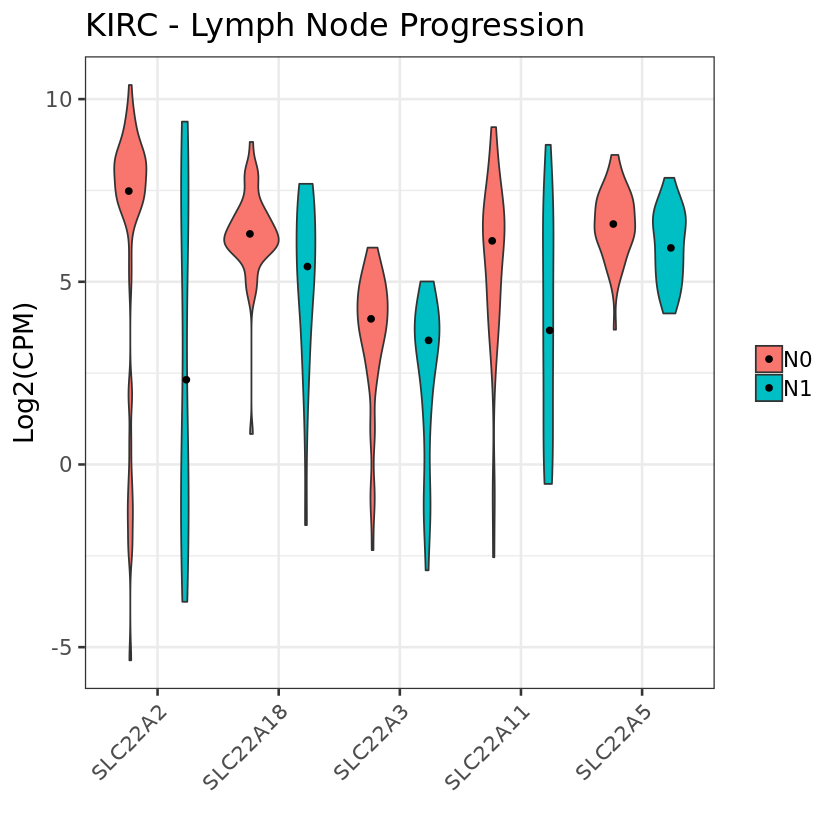

In [13]:
tmp.KIRP_race_age_gen_n <- which(KIRP_clin_data_tumor_filt_all_n$ajcc_pathologic_n %in% c("N0", "N1"))
tmp.KIRP_race_age_gen_n_sig <- rownames(KIRP_race_age_gen_n_topTable_SLC22)[KIRP_race_age_gen_n_topTable_SLC22$adj.P.Val < 0.1] 
tmp.KIRP_race_age_gen_n_sig
KIRP_race_age_gen_n_inp <- do.call(rbind.data.frame, lapply(tmp.KIRP_race_age_gen_n_sig, function(x)  {
        cbind.data.frame(KIRP_clin_data_tumor_filt_all_n[tmp.KIRP_race_age_gen_n,],
                         Gene=rep(KIRP_race_age_gen_n_topTable_SLC22$Symbol[rownames(KIRP_race_age_gen_n_topTable_SLC22) %in% x], 
                              nrow(KIRP_clin_data_tumor_filt_all_n[tmp.KIRP_race_age_gen_n,])),
                         Value=as.numeric(KIRP_voom_all_n$E[rownames(KIRP_voom_all_n) %in% x, tmp.KIRP_race_age_gen_n]))
    }))
KIRP_race_age_gen_n_inp$Gene <- factor(as.character(KIRP_race_age_gen_n_inp$Gene), 
                               levels=c("SLC22A2","SLC22A18", "SLC22A3", "SLC22A11", "SLC22A5"))                                                            

ggplot(KIRP_race_age_gen_n_inp, aes(x=Gene, y=Value, fill=ajcc_pathologic_n)) + geom_violin() +
    theme_bw(base_size=16) + ylab("Log2(CPM)") + labs(title="KIRC - Lymph Node Progression") + xlab("") +
    theme(legend.title=element_text(size=0)) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    stat_summary(fun = "median", geom='point', inherit.aes=TRUE, position=position_dodge(0.95)) + scale_color_brewer(palette="Set2")

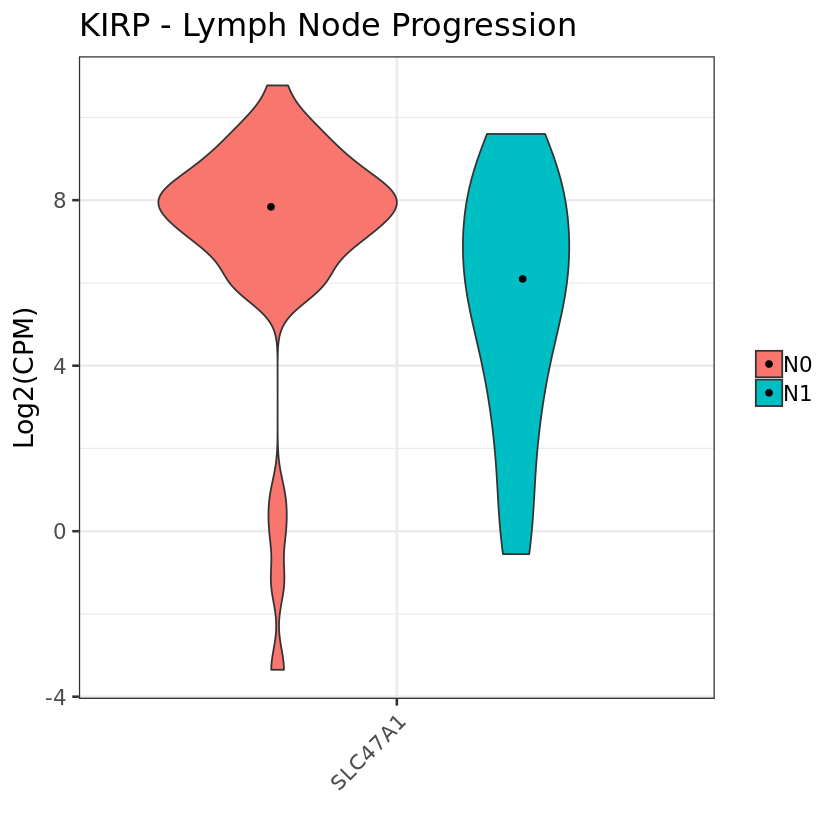

In [14]:
options(repr.plot.width=7, repr.plot.height=7)
tmp.KIRP_race_age_gen_n <- which(KIRP_clin_data_tumor_filt_all_n$ajcc_pathologic_n %in% c("N0", "N1"))
tmp.KIRP_race_age_gen_n_sig <- rownames(KIRP_race_age_gen_n_topTable_ADME)[KIRP_race_age_gen_n_topTable_ADME$Symbol %in% c("SLC47A1", "ABCG2")] 
KIRP_race_age_gen_n_inp <- do.call(rbind.data.frame, lapply(tmp.KIRP_race_age_gen_n_sig, function(x)  {
        cbind.data.frame(KIRP_clin_data_tumor_filt_all_n[tmp.KIRP_race_age_gen_n,],
                         Gene=rep(KIRP_race_age_gen_n_topTable_ADME$Symbol[rownames(KIRP_race_age_gen_n_topTable_ADME) %in% x], 
                              nrow(KIRP_clin_data_tumor_filt_all_n[tmp.KIRP_race_age_gen_n,])),
                         Value=as.numeric(KIRP_voom_all_n$E[rownames(KIRP_voom_all_n) %in% x, tmp.KIRP_race_age_gen_n]))
    }))
KIRP_race_age_gen_n_inp$Gene <- factor(as.character(KIRP_race_age_gen_n_inp$Gene), 
                               levels=c("ABCG2","SLC47A1"))                                                            

ggplot(KIRP_race_age_gen_n_inp, aes(x=Gene, y=Value, fill=ajcc_pathologic_n)) + geom_violin() +
    theme_bw(base_size=16) + ylab("Log2(CPM)") + labs(title="KIRP - Lymph Node Progression") + xlab("") +
    theme(legend.title=element_text(size=0)) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    stat_summary(fun = "median", geom='point', inherit.aes=TRUE, position=position_dodge(0.95)) + scale_color_brewer(palette="Set2")

In [15]:
KIRP_n_network_inp <- read.csv(file="Nigam_topTable_KIRP_ajcc_path_n_DE_brinADMEgenes_update_04212022.txt", sep="\t", header=TRUE)
KIRP_n_network_inp_sig <- KIRP_n_network_inp[KIRP_n_network_inp$adj.P.Val < 0.1,]
KIRP_n_network_inp_sig_exp <- KIRP_voom_race_age_gen$E[rownames(KIRP_voom_race_age_gen$E) %in% 
                                                       rownames(KIRP_n_network_inp_sig),]
rownames(KIRP_n_network_inp_sig_exp) <- KIRP_n_network_inp_sig$Symbol[match(rownames(KIRP_n_network_inp_sig_exp),
                                                                                rownames(KIRP_n_network_inp_sig))]

KIRP_clin_data_tumor_ML_inp <- KIRP_clin_data_tumor_filt_race_age_gen[,c(2,4,48), drop=FALSE]
KIRP_clin_data_tumor_ML_inp$gender <- as.numeric(KIRP_clin_data_tumor_filt_race_age_gen$gender)-1
KIRP_clin_data_tumor_ML_inp$status <- as.numeric(factor(KIRP_clin_data_tumor_filt_race_age_gen$vital_status))-1
KIRP_clin_data_tumor_ML_inp$days_to_last_follow_up[KIRP_clin_data_tumor_ML_inp$status == 
        1] <- KIRP_clin_data_tumor_filt_race_age_gen$days_to_death[match(KIRP_clin_data_tumor_ML_inp$case_submitter_id[
    KIRP_clin_data_tumor_ML_inp$status == 1], KIRP_clin_data_tumor_filt_race_age_gen$case_submitter_id)]
KIRP_clin_data_tumor_ML_inp$race_white <- ifelse(KIRP_clin_data_tumor_filt_race_age_gen$race == "white", 1, 0)
KIRP_clin_data_tumor_ML_inp$race_black <- ifelse(KIRP_clin_data_tumor_filt_race_age_gen$race == "black", 1, 0)
KIRP_clin_data_tumor_ML_inp$race_asian <- ifelse(KIRP_clin_data_tumor_filt_race_age_gen$race == "asian", 1, 0)
KIRP_clin_data_tumor_ML_inp$race_NR <- ifelse(KIRP_clin_data_tumor_filt_race_age_gen$race == "not_reported", 1, 0)
KIRP_clin_data_tumor_ML_inp$t_T1 <- ifelse(KIRP_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_t %in% c("T1", "T1a", "T1b"), 1, 0)
KIRP_clin_data_tumor_ML_inp$t_T2 <- ifelse(KIRP_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_t %in% c("T2", "T2a", "T2b"), 1, 0)
KIRP_clin_data_tumor_ML_inp$t_T3 <- ifelse(KIRP_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_t %in% c("T3", "T3a", "T3b"), 1, 0)
KIRP_clin_data_tumor_ML_inp$t_T4 <- ifelse(KIRP_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_t %in% c("T4"), 1, 0)
KIRP_clin_data_tumor_ML_inp$t_T1 <- ifelse(KIRP_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_t %in% c("T1", "T1a", "T1b"), 1, 0)
KIRP_clin_data_tumor_ML_inp$m_M0 <- ifelse(KIRP_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_m %in% c("M0"), 1, 0)
KIRP_clin_data_tumor_ML_inp$m_M1 <- ifelse(KIRP_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_m %in% c("M1"), 1, 0)
KIRP_clin_data_tumor_ML_inp$m_MX <- ifelse(KIRP_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_m %in% c("MX"), 1, 0)
KIRP_clin_data_tumor_ML_inp$n_N0 <- ifelse(KIRP_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_n %in% c("N0"), 1, 0)
KIRP_clin_data_tumor_ML_inp$n_N1 <- ifelse(KIRP_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_n %in% c("N1"), 1, 0)
KIRP_clin_data_tumor_ML_inp$n_NX <- ifelse(KIRP_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_n %in% c("NX"), 1, 0)
KIRP_clin_data_sigDE_n_network_inp_exp <- cbind.data.frame(KIRP_clin_data_tumor_ML_inp, 
                                                          as.data.frame(t(KIRP_n_network_inp_sig_exp)))


In [367]:
# Write Network File, NOT RUN
write.csv(KIRP_clin_data_sigDE_n_network_inp_exp, file="Nigam_TCGA_KIRP_n_network_inp_clin_data.csv")

## Survival Analysis 

In [16]:
KIRP_surv_inp <- data.frame(status=as.numeric(as.factor(KIRP_clin_data_tumor_filt$vital_status)), 
                            time=as.numeric(KIRP_clin_data_tumor_filt$days_to_last_follow_up),
                            age=KIRP_clin_data_tumor_filt$age_at_index,
                            age2=as.numeric(KIRP_clin_data_tumor_filt$age_at_diagnosis),
                            gender=as.numeric(KIRP_clin_data_tumor_filt$gender))
KIRP_surv_inp$time[which(KIRP_surv_inp$status == 2)] <- as.numeric(KIRP_clin_data_tumor_filt$days_to_death[which(KIRP_surv_inp$status == 2)])
rownames(KIRP_surv_inp) <- KIRP_clin_data_tumor_filt$case_submitter_id
KIRP_surv_inp$Stage1 <- KIRP_surv_inp$Stage2 <- KIRP_surv_inp$Stage3 <- KIRP_surv_inp$Stage4 <- KIRP_surv_inp$M0 <- 
KIRP_surv_inp$M1 <- KIRP_surv_inp$N0 <- KIRP_surv_inp$N1 <- KIRP_surv_inp$T1 <- KIRP_surv_inp$T2 <- 
KIRP_surv_inp$T3 <- KIRP_surv_inp$RaceWhite <- KIRP_surv_inp$RaceBlack <- KIRP_surv_inp$RaceAsian <- 
KIRP_surv_inp$PriMalig <- KIRP_surv_inp$SecMalig <- 0
KIRP_surv_inp$Stage1[which(as.character(KIRP_clin_data_tumor_filt$ajcc_pathologic_stage) == "StageI")] <- 1
KIRP_surv_inp$Stage2[which(as.character(KIRP_clin_data_tumor_filt$ajcc_pathologic_stage) == "StageII")] <- 1
KIRP_surv_inp$Stage3[which(as.character(KIRP_clin_data_tumor_filt$ajcc_pathologic_stage) == "StageIII")] <- 1
KIRP_surv_inp$Stage4[which(as.character(KIRP_clin_data_tumor_filt$ajcc_pathologic_stage) == "StageIV")] <- 1
KIRP_surv_inp$Stage <- factor(as.character(KIRP_clin_data_tumor_filt$ajcc_clinical_stage))
KIRP_surv_inp$M0[which(as.character(KIRP_clin_data_tumor_filt$ajcc_pathologic_m) == "M0")] <- 1
KIRP_surv_inp$M1[which(as.character(KIRP_clin_data_tumor_filt$ajcc_pathologic_m) == "M1")] <- 1
KIRP_surv_inp$M <- factor(as.character(KIRP_clin_data_tumor_filt$ajcc_pathologic_m))
KIRP_surv_inp$N0[which(as.character(KIRP_clin_data_tumor_filt$ajcc_pathologic_n) == "N0")] <- 1
KIRP_surv_inp$N1[which(as.character(KIRP_clin_data_tumor_filt$ajcc_pathologic_n) == "N1")] <- 1
KIRP_surv_inp$N <- factor(as.character(KIRP_clin_data_tumor_filt$ajcc_pathologic_n))
KIRP_surv_inp$T1[which(as.character(KIRP_clin_data_tumor_filt$ajcc_pathologic_t) %in% c("T1", "T1a", "T1b"))] <- 1
KIRP_surv_inp$T2[which(as.character(KIRP_clin_data_tumor_filt$ajcc_pathologic_t) %in% c("T2", "T2a", "T2b"))] <- 1
KIRP_surv_inp$T3[which(as.character(KIRP_clin_data_tumor_filt$ajcc_pathologic_t) %in% c("T3", "T3a", "T3b", "T3c"))] <- 1
KIRP_surv_inp$T <- factor(gsub("T3a|T3b|T3c", "T3", gsub("T2a|T2b", "T2", 
                                gsub("T1a|T1b", "T1", as.character(KIRP_clin_data_tumor_filt$ajcc_pathologic_t)))))
KIRP_surv_inp$RaceWhite[which(as.character(KIRP_clin_data_tumor_filt$race) == "white")] <- 1
KIRP_surv_inp$RaceBlack[which(as.character(KIRP_clin_data_tumor_filt$race) == "black or african american")] <- 1
KIRP_surv_inp$RaceAsian[which(as.character(KIRP_clin_data_tumor_filt$race) == "asian")] <- 1
KIRP_surv_inp$PriMalig[which(as.character(KIRP_clin_data_tumor_filt$prior_malignancy) == "yes")] <- 1
KIRP_surv_inp$TreatmentType <- factor(gsub(", NOS$", "", KIRP_clin_data_tumor_filt$treatment_type))
KIRP_surv_inp$Race <- factor(gsub(" or african american$", "", as.character(KIRP_clin_data_tumor_filt$race)))


Warning message in data.frame(status = as.numeric(as.factor(KIRP_clin_data_tumor_filt$vital_status)), :
“NAs introduced by coercion”
Warning message in data.frame(status = as.numeric(as.factor(KIRP_clin_data_tumor_filt$vital_status)), :
“NAs introduced by coercion”


In [17]:
KIRP_data_tumor_SLC22 <- KIRP_data_tumor_filt_orig[match(all_SLC22_nodes_KIRP.df.filt$gene_id, 
                                                    rownames(KIRP_data_tumor_filt_orig)),]

KIRP_invNormTrans <- apply(KIRP_data_tumor_SLC22, 1, function(x) {
    round(qnorm((rank(x, na.last="keep")-0.5)/sum(!is.na(x))), digit=5)})
KIRP_invNormTrans.df <- as.data.frame(t(KIRP_invNormTrans)) ##(rows are genes, cols are samples)
dim(KIRP_invNormTrans.df)
KIRP_invNormTrans.df <- KIRP_invNormTrans.df[,match(rownames(KIRP_surv_inp),
                                    unlist(lapply(strsplit(colnames(KIRP_invNormTrans.df), split="\\."), function(x) {
                                            paste(x[[1]], x[[2]], x[[3]], sep="-")
                                    })))]


[1]  17 289

In [18]:
# Cox Proportions Hazard Model with SLC22 gene expression and no factors
KIRP_coxph.out_nofac <- list()
for (i in 1:nrow(KIRP_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRP_surv_inp, gene= as.numeric(KIRP_invNormTrans.df[i,]))
    tmp.surv <- coxph(Surv(time, status) ~ gene + age2 + gender, data=inv.df)
    KIRP_coxph.out_nofac[[i]] <- tmp.surv
}
KIRP_coxph.coef.pval_nofac.df <- do.call(rbind.data.frame, lapply(KIRP_coxph.out_nofac, function(x) summary(x)$coefficients[1,c(1,2,5)]))
rownames(KIRP_coxph.coef.pval_nofac.df) <- EG2SYM$symbol[match(rownames(KIRP_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRP_coxph.coef.pval_nofac.df) <- c("coef", "hazard_ratio","pval")

if(sum (KIRP_coxph.coef.pval_nofac.df$pval < 0.01) > 0) {
w_KIRP_cox_nofac <- which(KIRP_coxph.coef.pval_nofac.df$pval < 0.01)
show(KIRP_coxph.coef.pval_nofac.df[w_KIRP_cox_nofac,])
                                                                  
KIRP_cox_nofac_diag <- lapply(KIRP_coxph.out_nofac[w_KIRP_cox_nofac], function(x) cox.zph(x))
KIRP_cox_nofac_diag_glob_p <- unlist(lapply(KIRP_cox_nofac_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRP_cox_nofac_diag_glob_p)
w_KIRP_cox_nofac_diag <- which(KIRP_cox_nofac_diag_glob_p < 0.05)
}

               coef hazard_ratio         pval
SLC22A18 -0.4495384    0.6379226 6.486506e-03
SLC22A2  -0.9101868    0.4024490 1.313624e-06
SLC22A24 -0.5808486    0.5594234 7.492910e-04
[1] 0.005739828 0.005172514 0.016189459


In [19]:
# Cox Proportions Hazard Model with SLC22 gene expression and base factors (age, gender)
KIRP_coxph.out_base <- list()
for (i in 1:nrow(KIRP_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRP_surv_inp, gene= as.numeric(KIRP_invNormTrans.df[i,]))
    tmp.surv <- coxph(Surv(time, status) ~ gene + Stage1 + Stage2 + Stage3 + Stage4 + age2 + gender, data=inv.df)
    KIRP_coxph.out_base[[i]] <- tmp.surv
}
KIRP_coxph.coef.pval_base.df <- do.call(rbind.data.frame, lapply(KIRP_coxph.out_base, function(x) summary(x)$coefficients[1,c(1,2,5)]))
rownames(KIRP_coxph.coef.pval_base.df) <- EG2SYM$symbol[match(rownames(KIRP_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRP_coxph.coef.pval_base.df) <- c("coef","hazard_ratio", "pval")

w_KIRP_cox_base <- which(KIRP_coxph.coef.pval_base.df$pval < 0.01)
KIRP_coxph.coef.pval_base.df[w_KIRP_cox_base,]
                                                                  
KIRP_cox_base_diag <- lapply(KIRP_coxph.out_base[w_KIRP_cox_base], function(x) cox.zph(x))
KIRP_cox_base_diag_glob_p <- unlist(lapply(KIRP_cox_base_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
KIRP_cox_base_diag_glob_p
w_KIRP_cox_base_diag <- which(KIRP_cox_base_diag_glob_p < 0.01)


,coef,hazard_ratio,pval
,<dbl>,<dbl>,<dbl>
SLC22A18,-0.5529791,0.5752336,4.015022e-04
SLC22A2,-0.7817740,0.4575935,3.550625e-05
SLC22A24,-0.6141615,0.5410944,7.279835e-04


[1] 0.0004987568 0.0011311513 0.0016880189

In [20]:
# Cox Proportions Hazard Model with SLC22 gene expression, race, and base factors (age, gender)
KIRP_coxph.out_race <- list()
for (i in 1:nrow(KIRP_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRP_surv_inp, gene= as.numeric(KIRP_invNormTrans.df[i,]))
    inv.df <- subset(inv.df, Race != "indig")
    inv.df$Race <- droplevels(inv.df$Race)
    tmp.surv <- coxph(Surv(time, status) ~ gene + age2 + gender + Race, data=inv.df)
    KIRP_coxph.out_race[[i]] <- tmp.surv
}
KIRP_coxph.coef.pval_race.df <- do.call(rbind.data.frame, lapply(KIRP_coxph.out_race, function(x) summary(x)$coefficients[1,c(1,2,5)]))
rownames(KIRP_coxph.coef.pval_race.df) <- EG2SYM$symbol[match(rownames(KIRP_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRP_coxph.coef.pval_race.df) <- c("coef", "hazard_ratio","pval")

w_KIRP_cox_race <- which(KIRP_coxph.coef.pval_race.df$pval < 0.01)
KIRP_coxph.coef.pval_race.df[w_KIRP_cox_race,]
                                                                  
KIRP_cox_race_diag <- lapply(KIRP_coxph.out_race[w_KIRP_cox_race], function(x) cox.zph(x))
KIRP_cox_race_diag_glob_p <- unlist(lapply(KIRP_cox_race_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
KIRP_cox_race_diag_glob_p
w_KIRP_cox_race_diag <- which(KIRP_cox_race_diag_glob_p < 0.05)


,coef,hazard_ratio,pval
,<dbl>,<dbl>,<dbl>
SLC22A18,-0.4555792,0.6340806,5.443624e-03
SLC22A2,-0.8852318,0.4126185,2.829581e-06
SLC22A13,-0.4244354,0.6541390,7.849828e-03
SLC22A24,-0.6056222,0.5457347,5.743739e-04


[1] 0.03187677 0.03848551 0.03602478 0.04350497

In [21]:
# Cox Proportions Hazard Model with SLC22 gene expression, race, and base factors (age, gender)
KIRP_coxph.out_base_race2 <- list()
for (i in 1:nrow(KIRP_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRP_surv_inp, gene= as.numeric(KIRP_invNormTrans.df[i,]))
    inv.df <- subset(inv.df, Race != "indig")
    inv.df$Race <- droplevels(inv.df$Race)
    tmp.surv <- coxph(Surv(time, status) ~ gene + Stage1 + Stage2 + Stage3 + Stage4 + 
                              age2 + gender + RaceWhite + RaceBlack + RaceAsian, data=inv.df)
    KIRP_coxph.out_base_race2[[i]] <- tmp.surv
}
KIRP_coxph.coef.pval.base_race2.df <- do.call(rbind.data.frame, lapply(KIRP_coxph.out_base_race2, function(x) summary(x)$coefficients[1,c(1,2,5)]))
rownames(KIRP_coxph.coef.pval.base_race2.df) <- EG2SYM$symbol[match(rownames(KIRP_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRP_coxph.coef.pval.base_race2.df) <- c("coef","hazard_ratio", "pval")
if(sum(KIRP_coxph.coef.pval.base_race2.df$pval < 0.01) > 0) {
w_KIRP_cox_base_race2 <- which(KIRP_coxph.coef.pval.base_race2.df$pval < 0.01)
show(KIRP_coxph.coef.pval.base_race2.df[w_KIRP_cox_base_race2,])
                                                                  
KIRP_cox_base_race2_diag <- lapply(KIRP_coxph.out_base_race2[w_KIRP_cox_base_race2], function(x) cox.zph(x))
KIRP_cox_base_race2_diag_glob_p <- unlist(lapply(KIRP_cox_base_race2_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRP_cox_base_race2_diag_glob_p)
w_KIRP_cox_base_race2_diag <- which(KIRP_cox_base_race2_diag_glob_p < 0.05)
}



               coef hazard_ratio         pval
SLC22A18 -0.5686457    0.5662919 0.0002787875
SLC22A2  -0.7520255    0.4714107 0.0000591176
SLC22A24 -0.6359888    0.5294118 0.0005906174
[1] 0.001653148 0.003686694 0.004874301


In [22]:
# Cox Proportions Hazard Model with SLC22 gene expression, primary malignancy, and base factors (age, gender)
KIRP_coxph.out_priMalig <- KIRP_coxph.mod_priMalig <- list()
for (i in 1:nrow(KIRP_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRP_surv_inp, gene= as.numeric(KIRP_invNormTrans.df[i,]))
    tmp.surv <- summary(coxph(Surv(time, status) ~ gene + age2 + gender + PriMalig, data=inv.df))
    tmp.mod <- coxph(Surv(time, status) ~ gene + age2 + gender + PriMalig, data=inv.df)
    KIRP_coxph.out_priMalig[[i]] <- tmp.surv
    KIRP_coxph.mod_priMalig[[i]] <- tmp.mod
}
KIRP_coxph.coef.pval_priMalig.df <- do.call(rbind.data.frame, lapply(KIRP_coxph.out_priMalig, function(x) x$coefficients[1,c(1,2,5)]))
rownames(KIRP_coxph.coef.pval_priMalig.df) <- EG2SYM$symbol[match(rownames(KIRP_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRP_coxph.coef.pval_priMalig.df) <- c("coef", "hazard_ratio", "pval")
                                                                     
if(sum(KIRP_coxph.coef.pval_priMalig.df$pval < 0.01) > 0) {
w_KIRP_cox_priMalig <- which(KIRP_coxph.coef.pval_priMalig.df$pval < 0.01)
show(KIRP_coxph.coef.pval_priMalig.df[w_KIRP_cox_priMalig,])
                                                                  
KIRP_cox_priMalig_diag <- lapply(KIRP_coxph.mod_priMalig[w_KIRP_cox_priMalig], function(x) cox.zph(x))
KIRP_cox_priMalig_diag_glob_p <- unlist(lapply(KIRP_cox_priMalig_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRP_cox_priMalig_diag_glob_p)
w_KIRP_cox_priMalig_diag <- which(KIRP_cox_priMalig_diag_glob_p < 0.05)
}
                                 
#KIRP_cox_priMalig_diag
SLC22A2.KIRP.inv.df <- cbind.data.frame(KIRP_surv_inp, gene= as.numeric(KIRP_invNormTrans.df[5,]))          
SLC22A2.KIRP.priMalig.surv <- summary(coxph(Surv(time, status) ~ gene + age2 + gender + PriMalig, 
                                            data=SLC22A2.KIRP.inv.df))
SLC22A2.KIRP.priMalig.mod <- coxph(Surv(time, status) ~ gene + age2 + gender + PriMalig, 
                                   data=SLC22A2.KIRP.inv.df)
SLC22A2.KIRP.priMalig.surv2 <- summary(coxph(Surv(time, status) ~ gene + strata(age2) + gender + PriMalig, 
                                            data=SLC22A2.KIRP.inv.df))
SLC22A2.KIRP.priMalig.mod2 <- coxph(Surv(time, status) ~ gene + strata(age2) + gender + PriMalig, 
                                   data=SLC22A2.KIRP.inv.df)

                              

               coef hazard_ratio         pval
SLC22A18 -0.4597203    0.6314602 5.643067e-03
SLC22A2  -0.9105052    0.4023209 1.096492e-06
SLC22A24 -0.5916532    0.5534116 6.834294e-04
[1] 0.007026719 0.005521878 0.010139356


Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in sqrt(diag(cox$var)):
“NaNs produced”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”


In [23]:
# Cox Proportions Hazard Model with SLC22 gene expression, primary malignancy, race, and base factors (age, gender)
KIRP_coxph.out_priMalig_race <- list()
for (i in 1:nrow(KIRP_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRP_surv_inp, gene= as.numeric(KIRP_invNormTrans.df[i,]))
    inv.df <- subset(inv.df, Race != "indig")
    inv.df$Race <- droplevels(inv.df$Race)
    tmp.surv <- coxph(Surv(time, status) ~ gene + age2 + gender + 
                              PriMalig + Race, data=inv.df)
    KIRP_coxph.out_priMalig_race[[i]] <- tmp.surv
}
KIRP_coxph.coef.pval_priMalig_race.df <- do.call(rbind.data.frame, lapply(KIRP_coxph.out_priMalig_race, function(x) summary(x)$coefficients[1,c(1,2,5)]))
rownames(KIRP_coxph.coef.pval_priMalig_race.df) <- EG2SYM$symbol[match(rownames(KIRP_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRP_coxph.coef.pval_priMalig_race.df) <- c("coef","hazard_ratio", "pval")
                                                                          
if(sum (KIRP_coxph.coef.pval_priMalig_race.df$pval < 0.01) > 0) {
w_KIRP_cox_priMalig_race <- which(KIRP_coxph.coef.pval_priMalig_race.df$pval < 0.01)
show(KIRP_coxph.coef.pval_priMalig_race.df[w_KIRP_cox_priMalig_race,])
                                                                  
KIRP_cox_priMalig_race_diag <- lapply(KIRP_coxph.out_priMalig_race[w_KIRP_cox_priMalig_race], function(x) cox.zph(x))
KIRP_cox_priMalig_race_diag_glob_p <- unlist(lapply(KIRP_cox_priMalig_race_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRP_cox_priMalig_race_diag_glob_p)
w_KIRP_cox_priMalig_race_diag <- which(KIRP_cox_priMalig_race_diag_glob_p < 0.05)
}

               coef hazard_ratio         pval
SLC22A18 -0.4671379    0.6267937 4.542739e-03
SLC22A2  -0.8863224    0.4121688 2.294701e-06
SLC22A13 -0.4317372    0.6493800 6.976518e-03
SLC22A23  0.4219007    1.5248570 9.939883e-03
SLC22A24 -0.6179197    0.5390647 5.080191e-04
[1] 0.03212799 0.03297396 0.02064991 0.03805713 0.02320433


In [24]:
# Cox Proportions Hazard Model with SLC22 gene expression, treatment type, and base factors (age, gender)
KIRP_coxph.out_treatment <- list()
for (i in 1:nrow(KIRP_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRP_surv_inp, gene= as.numeric(KIRP_invNormTrans.df[i,]))
    tmp.surv <- coxph(Surv(time, status) ~ gene + age2 + gender + TreatmentType, data=inv.df)
    KIRP_coxph.out_treatment[[i]] <- tmp.surv
}
KIRP_coxph.coef.pval_treatment.df <- do.call(rbind.data.frame, lapply(KIRP_coxph.out_treatment, function(x) summary(x)$coefficients[1,c(1,2,5)]))
rownames(KIRP_coxph.coef.pval_treatment.df) <- EG2SYM$symbol[match(rownames(KIRP_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRP_coxph.coef.pval_treatment.df) <- c("coef","hazard_ratio", "pval")
                                                                     
if(sum (KIRP_coxph.coef.pval_treatment.df$pval < 0.01) > 0) {
w_KIRP_cox_treatment <- which(KIRP_coxph.coef.pval_treatment.df$pval < 0.01)
show(KIRP_coxph.coef.pval_treatment.df[w_KIRP_cox_treatment,])
                                                                  
KIRP_cox_treatment_diag <- lapply(KIRP_coxph.out_treatment[w_KIRP_cox_treatment], function(x) cox.zph(x))
KIRP_cox_treatment_diag_glob_p <- unlist(lapply(KIRP_cox_treatment_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRP_cox_treatment_diag_glob_p)
w_KIRP_cox_treatment_diag <- which(KIRP_cox_treatment_diag_glob_p < 0.01)
}
                              

               coef hazard_ratio         pval
SLC22A18 -0.4485935    0.6385256 6.722625e-03
SLC22A2  -0.9087330    0.4030346 1.376105e-06
SLC22A24 -0.5801044    0.5598399 7.394708e-04
[1] 0.01124940 0.01102998 0.02786368


In [25]:
# Cox Proportions Hazard Model with SLC22 gene expression, treatment type, race, and base factors (age, gender)
KIRP_coxph.out_treatment_race <- list()
for (i in 1:nrow(KIRP_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRP_surv_inp, gene= as.numeric(KIRP_invNormTrans.df[i,]))
    inv.df <- subset(inv.df, Race != "indig")
    inv.df$Race <- droplevels(inv.df$Race)
    tmp.surv <- coxph(Surv(time, status) ~ gene + age2 + gender + TreatmentType + Race, data=inv.df)
    KIRP_coxph.out_treatment_race[[i]] <- tmp.surv
}
KIRP_coxph.coef.pval_treatment_race.df <- do.call(rbind.data.frame, lapply(KIRP_coxph.out_treatment_race, function(x) summary(x)$coefficients[1,c(1,2,5)]))
rownames(KIRP_coxph.coef.pval_treatment_race.df) <- EG2SYM$symbol[match(rownames(KIRP_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRP_coxph.coef.pval_treatment_race.df) <- c("coef","hazard_ratio", "pval")
                                                                                                                                                
if(sum (KIRP_coxph.coef.pval_treatment_race.df$pval < 0.0005) > 0) {
w_KIRP_cox_treatment_race <- which(KIRP_coxph.coef.pval_treatment_race.df$pval < 0.0005)
show(KIRP_coxph.coef.pval_treatment_race.df[w_KIRP_cox_treatment_race,])
                                                                  
KIRP_cox_treatment_race_diag <- lapply(KIRP_coxph.out_treatment_race[w_KIRP_cox_treatment_race], function(x) cox.zph(x))
KIRP_cox_treatment_race_diag_glob_p <- unlist(lapply(KIRP_cox_treatment_race_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRP_cox_treatment_race_diag_glob_p)
w_KIRP_cox_treatment_race_diag <- which(KIRP_cox_treatment_race_diag_glob_p < 0.01)
}


              coef hazard_ratio         pval
SLC22A2 -0.8841183    0.4130782 2.876815e-06
[1] 0.06008774


In [26]:
# Cox Proportions Hazard Model with SLC22 gene expression, pathologic stage, and base factors (age, gender)
KIRP_coxph.out_stage <- list()
for (i in 1:nrow(KIRP_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRP_surv_inp, gene= as.numeric(KIRP_invNormTrans.df[i,]))
    tmp.surv <- coxph(Surv(time, status) ~ gene + age2 + gender + Stage, 
                              data=inv.df)
    KIRP_coxph.out_stage[[i]] <- tmp.surv
}
KIRP_coxph.coef.pval_stage.df <- do.call(rbind.data.frame, lapply(KIRP_coxph.out_stage, function(x) summary(x)$coefficients[1,c(1,2,5)]))
rownames(KIRP_coxph.coef.pval_stage.df) <- EG2SYM$symbol[match(rownames(KIRP_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRP_coxph.coef.pval_stage.df) <- c("coef", "hazard_ratio","pval")
                                                                                                                                            
if(sum (KIRP_coxph.coef.pval_stage.df$pval < 0.0005) > 0) {
w_KIRP_cox_stage <- which(KIRP_coxph.coef.pval_stage.df$pval < 0.0005)
show(KIRP_coxph.coef.pval_stage.df[w_KIRP_cox_stage,])
                                                                  
KIRP_cox_stage_diag <- lapply(KIRP_coxph.out_stage[w_KIRP_cox_stage], function(x) cox.zph(x))
KIRP_cox_stage_diag_glob_p <- unlist(lapply(KIRP_cox_stage_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRP_cox_stage_diag_glob_p)
w_KIRP_cox_stage_diag <- which(KIRP_cox_stage_diag_glob_p < 0.05)
}

               coef hazard_ratio         pval
SLC22A2  -0.8608859    0.4227874 1.695237e-06
SLC22A24 -0.7178532    0.4877984 4.989184e-05
[1] 0.001727426 0.003243918


In [27]:
# Cox Proportions Hazard Model with SLC22 gene expression, pathologic stage, race, and base factors (age, gender)
KIRP_coxph.out_stage_race <- KIRP_coxph.mod_stage_race <- list()
for (i in 1:nrow(KIRP_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRP_surv_inp, gene= as.numeric(KIRP_invNormTrans.df[i,]))
    inv.df <- subset(inv.df, Race != "indig")
    inv.df$Race <- droplevels(inv.df$Race)
    tmp.surv <- summary(coxph(Surv(time, status) ~ gene + age2 + gender + Stage + Race, data=inv.df))
    tmp.mod <- coxph(Surv(time, status) ~ gene + age2 + gender + Stage + Race, data=inv.df)
    KIRP_coxph.out_stage_race[[i]] <- tmp.surv
    KIRP_coxph.mod_stage_race[[i]] <- tmp.mod
}
KIRP_coxph.coef.pval_stage_race.df <- do.call(rbind.data.frame, lapply(KIRP_coxph.out_stage_race, function(x) x$coefficients[1,c(1,2,5)]))
rownames(KIRP_coxph.coef.pval_stage_race.df) <- EG2SYM$symbol[match(rownames(KIRP_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRP_coxph.coef.pval_stage_race.df) <- c("coef", "hazard_ratio","pval")
names(KIRP_coxph.mod_stage_race) <- names(KIRP_coxph.out_stage_race) <- rownames(KIRP_coxph.coef.pval_stage_race.df)
                                                                       
                                                                                                                                                 
if(sum (KIRP_coxph.coef.pval_stage_race.df$pval < 0.0005) > 0) {
w_KIRP_cox_stage_race <- which(KIRP_coxph.coef.pval_stage_race.df$pval < 0.0005)
show(KIRP_coxph.coef.pval_stage_race.df[w_KIRP_cox_stage_race,])
                                                                  
KIRP_cox_stage_race_diag <- lapply(KIRP_coxph.mod_stage_race[w_KIRP_cox_stage_race], function(x) cox.zph(x))
KIRP_cox_stage_race_diag_glob_p <- unlist(lapply(KIRP_cox_stage_race_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRP_cox_stage_race_diag_glob_p)
w_KIRP_cox_stage_race_diag <- which(KIRP_cox_stage_race_diag_glob_p < 0.05)
}

               coef hazard_ratio         pval
SLC22A18 -0.5370928    0.5844449 3.296065e-04
SLC22A2  -0.8513621    0.4268331 1.434635e-06
SLC22A24 -0.7573798    0.4688934 3.263103e-05
   SLC22A18     SLC22A2    SLC22A24 
0.005139539 0.007730497 0.008719193 


In [28]:
# Cox Proportions Hazard Model with SLC22 gene expression, presence of metastasis, and base factors (age, gender)
KIRP_coxph.out_m <- list()
for (i in 1:nrow(KIRP_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRP_surv_inp, gene= as.numeric(KIRP_invNormTrans.df[i,]))
    tmp.surv <-coxph(Surv(time, status) ~ gene + age2 + gender + M0 + M1, 
                              data=inv.df)
    KIRP_coxph.out_m[[i]] <- tmp.surv
}
length(KIRP_coxph.out_m)
#KIRP_coxph.coef.pval_m.df <- do.call(rbind.data.frame, lapply(KIRP_coxph.out_m, function(x) summary(x)$coefficients[1,c(1,2,5)]))
KIRP_coxph.coef.pval_m.df <- do.call(rbind.data.frame, lapply(KIRP_coxph.out_m, function(x) summary(x)$coefficients[1,c(1,2,5)]))
rownames(KIRP_coxph.coef.pval_m.df) <- EG2SYM$symbol[match(rownames(KIRP_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRP_coxph.coef.pval_m.df) <- c("coef", "hazard_ratio","pval")
                                                                                                                                                 
if(sum (KIRP_coxph.coef.pval_m.df$pval < 0.0005) > 0) {
w_KIRP_cox_m <- which(KIRP_coxph.coef.pval_m.df$pval < 0.0005)
show(KIRP_coxph.coef.pval_m.df[w_KIRP_cox_m,])
                                                                  
KIRP_cox_m_diag <- lapply(KIRP_coxph.out_m[w_KIRP_cox_m], function(x) cox.zph(x))
KIRP_cox_m_diag_glob_p <- unlist(lapply(KIRP_cox_m_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRP_cox_m_diag_glob_p)
w_KIRP_cox_m_diag <- which(KIRP_cox_m_diag_glob_p < 0.05)
}

[1] 17

              coef hazard_ratio        pval
SLC22A2 -0.8844331    0.4129482 1.16886e-05
[1] 0.005532825


In [29]:
# Cox Proportions Hazard Model with SLC22 gene expression, presence of metastasis, race, and base factors (age, gender)
KIRP_coxph.out_m_race <- list()
for (i in 1:nrow(KIRP_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRP_surv_inp, gene= as.numeric(KIRP_invNormTrans.df[i,]))
    inv.df <- subset(inv.df, Race != "indig")
    inv.df$Race <- droplevels(inv.df$Race)
    tmp.surv <- coxph(Surv(time, status) ~ gene + age2 + gender + M0 + M1 + Race, 
                              data=inv.df)
    KIRP_coxph.out_m_race[[i]] <- tmp.surv
}
KIRP_coxph.coef.pval_m_race.df <- do.call(rbind.data.frame, lapply(KIRP_coxph.out_m_race, function(x) summary(x)$coefficients[1,c(1,2,5)]))
#KIRP_coxph.coef.pval_m_race.df <- do.call(rbind.data.frame, lapply(KIRP_coxph.out_m_race, function(x) x$coefficients[c(1,2,5)]))
rownames(KIRP_coxph.coef.pval_m_race.df) <- EG2SYM$symbol[match(rownames(KIRP_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRP_coxph.coef.pval_m_race.df) <- c("coef","hazard_ratio", "pval")
                                                                                                                                                 
if(sum (KIRP_coxph.coef.pval_m_race.df$pval < 0.0005) > 0) {
w_KIRP_cox_m_race <- which(KIRP_coxph.coef.pval_m_race.df$pval < 0.0005)
show(KIRP_coxph.coef.pval_m_race.df[w_KIRP_cox_m_race,])
                                                                  
KIRP_cox_m_race_diag <- lapply(KIRP_coxph.out_m_race[w_KIRP_cox_m_race], function(x) cox.zph(x))
KIRP_cox_m_race_diag_glob_p <- unlist(lapply(KIRP_cox_m_race_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRP_cox_m_race_diag_glob_p)
w_KIRP_cox_m_race_diag <- which(KIRP_cox_m_race_diag_glob_p < 0.05)
}

              coef hazard_ratio         pval
SLC22A2 -0.8445918    0.4297328 2.523022e-05
[1] 0.01714071


In [30]:
# Cox Proportions Hazard Model with SLC22 gene expression, lymph node involvement, and base factors (age, gender)
KIRP_coxph.out_n <- list()
for (i in 1:nrow(KIRP_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRP_surv_inp, gene= as.numeric(KIRP_invNormTrans.df[i,]))
    tmp.surv <- coxph(Surv(time, status) ~ gene + age2 + gender + N0 + N1, 
                              data=inv.df)
    KIRP_coxph.out_n[[i]] <- tmp.surv
}
KIRP_coxph.coef.pval_n.df <- do.call(rbind.data.frame, lapply(KIRP_coxph.out_n, function(x) summary(x)$coefficients[1,c(1,2,5)]))
rownames(KIRP_coxph.coef.pval_n.df) <- EG2SYM$symbol[match(rownames(KIRP_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRP_coxph.coef.pval_n.df) <- c("coef", "hazard_ratio", "pval")
 
                                                                                                                                                                                                               
if(sum (KIRP_coxph.coef.pval_n.df$pval < 0.0005) > 0) {
w_KIRP_cox_n <- which(KIRP_coxph.coef.pval_n.df$pval < 0.0005)
show(KIRP_coxph.coef.pval_n.df[w_KIRP_cox_n,])
                                                                  
KIRP_cox_n_diag <- lapply(KIRP_coxph.out_n[w_KIRP_cox_n], function(x) cox.zph(x))
KIRP_cox_n_diag_glob_p <- unlist(lapply(KIRP_cox_n_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRP_cox_n_diag_glob_p)
w_KIRP_cox_n_diag <- which(KIRP_cox_n_diag_glob_p < 0.05)
}
                                   


               coef hazard_ratio         pval
SLC22A2  -0.7515369    0.4716412 0.0000347136
SLC22A13 -0.6066311    0.5451845 0.0002719233
SLC22A24 -0.6398630    0.5273647 0.0003230589
[1] 0.002436235 0.026390115 0.022796444


In [31]:
# Cox Proportions Hazard Model with SLC22 gene expression, lymph node involvement, race, and base factors (age, gender)
KIRP_coxph.out_n_race <- KIRP_coxph.mod_n_race <- list()
for (i in 1:nrow(KIRP_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRP_surv_inp, gene= as.numeric(KIRP_invNormTrans.df[i,]))
    inv.df <- subset(inv.df, Race != "indig")
    inv.df$Race <- droplevels(inv.df$Race)
    tmp.surv <- summary(coxph(Surv(time, status) ~ gene + age2 + gender + N0 + N1 + Race, data=inv.df))
    tmp.mod <- coxph(Surv(time, status) ~ gene + age2 + gender + N0 + N1 + Race, data=inv.df)
    KIRP_coxph.out_n_race[[i]] <- tmp.surv
    KIRP_coxph.mod_n_race[[i]] <- tmp.mod
}
KIRP_coxph.coef.pval_n_race.df <- do.call(rbind.data.frame, lapply(KIRP_coxph.out_n_race, function(x) x$coefficients[1,c(1,2,5)]))
rownames(KIRP_coxph.coef.pval_n_race.df) <- EG2SYM$symbol[match(rownames(KIRP_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRP_coxph.coef.pval_n_race.df) <- c("coef", "hazard_ratio","pval")
                                                                                                                                                 
if(sum(KIRP_coxph.coef.pval_n_race.df$pval < 0.0005) > 0) {
w_KIRP_cox_n_race <- which(KIRP_coxph.coef.pval_n_race.df$pval < 0.0005)
show(KIRP_coxph.coef.pval_n_race.df[w_KIRP_cox_n_race,])
                                                                  
KIRP_cox_n_race_diag <- lapply(KIRP_coxph.mod_n_race[w_KIRP_cox_n_race], function(x) cox.zph(x))
KIRP_cox_n_race_diag_glob_p <- unlist(lapply(KIRP_cox_n_race_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRP_cox_n_race_diag_glob_p)
w_KIRP_cox_n_race_diag <- which(KIRP_cox_n_race_diag_glob_p < 0.05)
}
                                   


               coef hazard_ratio         pval
SLC22A2  -0.7455377    0.4744791 3.207595e-05
SLC22A13 -0.6220821    0.5368255 1.913499e-04
SLC22A24 -0.7126921    0.4903224 9.898186e-05
[1] 0.03067460 0.11644770 0.09201975


In [32]:
# Cox Proportions Hazard Model with SLC22 gene expression, tumor size/progression, and base factors (age, gender)
KIRP_coxph.out_t <- list()
for (i in 1:nrow(KIRP_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRP_surv_inp, gene= as.numeric(KIRP_invNormTrans.df[i,]))
    tmp.surv <- coxph(Surv(time, status) ~ gene + age2 + gender + T1 + T2 + T3, 
                              data=inv.df)
    KIRP_coxph.out_t[[i]] <- tmp.surv
}
KIRP_coxph.coef.pval_t.df <- do.call(rbind.data.frame, lapply(KIRP_coxph.out_t, function(x) summary(x)$coefficients[1,c(1,2,5)]))
rownames(KIRP_coxph.coef.pval_t.df) <- EG2SYM$symbol[match(rownames(KIRP_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRP_coxph.coef.pval_t.df) <- c("coef","hazard_ratio", "pval")
                                                                                                                                                                                                               
if(sum (KIRP_coxph.coef.pval_t.df$pval < 0.0005) > 0) {
w_KIRP_cox_t <- which(KIRP_coxph.coef.pval_t.df$pval < 0.0005)
show(KIRP_coxph.coef.pval_t.df[w_KIRP_cox_t,])
                                                                  
KIRP_cox_t_diag <- lapply(KIRP_coxph.out_t[w_KIRP_cox_t], function(x) cox.zph(x))
KIRP_cox_t_diag_glob_p <- unlist(lapply(KIRP_cox_t_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRP_cox_t_diag_glob_p)
w_KIRP_cox_t_diag <- which(KIRP_cox_t_diag_glob_p < 0.05)
}

               coef hazard_ratio         pval
SLC22A18 -0.6267465    0.5343274 1.386588e-04
SLC22A2  -0.8081409    0.4456859 1.141854e-05
[1] 0.02922411 0.01122410


In [33]:
# Cox Proportions Hazard Model with SLC22 gene expression, tumor size/progression, race, and base factors (age, gender)
KIRP_coxph.out_t_race <- KIRP_coxph.mod_t_race <- list()
for (i in 1:nrow(KIRP_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRP_surv_inp, gene= as.numeric(KIRP_invNormTrans.df[i,]))
    inv.df <- subset(inv.df, Race != "indig")
    inv.df$Race <- droplevels(inv.df$Race)
    tmp.surv <- summary(coxph(Surv(time, status) ~ gene + age2 + gender + T1 + T2 + T3 + Race, data=inv.df))
    tmp.mod <- coxph(Surv(time, status) ~ gene + age2 + gender + T1 + T2 + T3 + Race, data=inv.df)
    KIRP_coxph.out_t_race[[i]] <- tmp.surv
    KIRP_coxph.mod_t_race[[i]] <- tmp.mod
}
KIRP_coxph.coef.pval_t_race.df <- do.call(rbind.data.frame, lapply(KIRP_coxph.out_t_race, function(x) x$coefficients[1,c(1,2,5)]))
rownames(KIRP_coxph.coef.pval_t_race.df) <- EG2SYM$symbol[match(rownames(KIRP_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRP_coxph.coef.pval_t_race.df) <- c("coef", "hazard_ratio","pval")
KIRP_coxph.coef.pval_t_race.df[KIRP_coxph.coef.pval_t_race.df$pval < 0.0005,]
names(KIRP_coxph.mod_t_race) <- names(KIRP_coxph.out_t_race) <- rownames(KIRP_coxph.coef.pval_t_race.df)
                                                                                                                                                                                                                    
if(sum (KIRP_coxph.coef.pval_t_race.df$pval < 0.0005) > 0) {
w_KIRP_cox_t_race <- which(KIRP_coxph.coef.pval_t_race.df$pval < 0.0005)
show(KIRP_coxph.coef.pval_t_race.df[w_KIRP_cox_t_race,])
                                                                  
KIRP_cox_t_race_diag <- lapply(KIRP_coxph.mod_t_race[w_KIRP_cox_t_race], function(x) cox.zph(x))
KIRP_cox_t_race_diag_glob_p <- unlist(lapply(KIRP_cox_t_race_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRP_cox_t_race_diag_glob_p)
w_KIRP_cox_t_race_diag <- which(KIRP_cox_t_race_diag_glob_p < 0.05)
}

,coef,hazard_ratio,pval
,<dbl>,<dbl>,<dbl>
SLC22A18,-0.6503880,0.5218433,7.700767e-05
SLC22A2,-0.7879744,0.4547650,1.409344e-05


               coef hazard_ratio         pval
SLC22A18 -0.6503880    0.5218433 7.700767e-05
SLC22A2  -0.7879744    0.4547650 1.409344e-05
  SLC22A18    SLC22A2 
0.07316868 0.04199459 


In [38]:
KIRP_coxph.bygene <- lapply(rownames(KIRP_coxph.coef.pval_base.df), function(x) {
    n <- do.call(rbind.data.frame, lapply(list(KIRP_coxph.coef.pval_base.df, 
                                               KIRP_coxph.coef.pval_race.df, 
                                               KIRP_coxph.coef.pval_priMalig.df, KIRP_coxph.coef.pval_priMalig_race.df, 
                                               KIRP_coxph.coef.pval_treatment.df, KIRP_coxph.coef.pval_treatment_race.df,
                                               KIRP_coxph.coef.pval_stage.df, KIRP_coxph.coef.pval_stage_race.df, 
                                               KIRP_coxph.coef.pval_t.df, KIRP_coxph.coef.pval_t_race.df, 
                                               KIRP_coxph.coef.pval_n.df, KIRP_coxph.coef.pval_n_race.df,
                                               KIRP_coxph.coef.pval_m.df, KIRP_coxph.coef.pval_m_race.df)
                                               , function(y) {
        as.numeric(y[rownames(y) %in% x,])
    }))
    colnames(n) <- c("coef", "hazard", "pval")
    rownames(n) <- n$comp <- c("base", "race", "priMalig", "priMalig_race", "treatment", "treatment_race", 
                               "stage", "stage_race", "t", "t_race", "n", "n_race","m", "m_race")
    n$negLog.pval <- -log(n$pval, 10)
    n$padj <- p.adjust(n$pval, method = "BH")
    n$negLog.padj <- -log(n$padj, 10)
    n
})
names(KIRP_coxph.bygene) <- rownames(KIRP_coxph.coef.pval_base.df) 
KIRP_coxph.bygene

,coef,hazard,pval,comp,negLog.pval,padj,negLog.padj
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
base,-0.5529791,0.5752336,4.015022e-04,base,3.396312,0.0014052576,2.852244
race,-0.4555792,0.6340806,5.443624e-03,race,2.264112,0.0071820852,2.143749
priMalig,-0.4597203,0.6314602,5.643067e-03,priMalig,2.248485,0.0071820852,2.143749
priMalig_race,-0.4671379,0.6267937,4.542739e-03,priMalig_race,2.342682,0.0071820852,2.143749
treatment,-0.4485935,0.6385256,6.722625e-03,treatment,2.172461,0.0078430627,2.105514
treatment_race,-0.4551692,0.6343406,5.563081e-03,treatment_race,2.254685,0.0071820852,2.143749
stage,-0.5224717,0.5930529,5.201296e-04,stage,3.283888,0.0014563628,2.836730
stage_race,-0.5370928,0.5844449,3.296065e-04,stage_race,3.482004,0.0014052576,2.852244
t,-0.6267465,0.5343274,1.386588e-04,t,3.858053,0.0009706116,3.012955


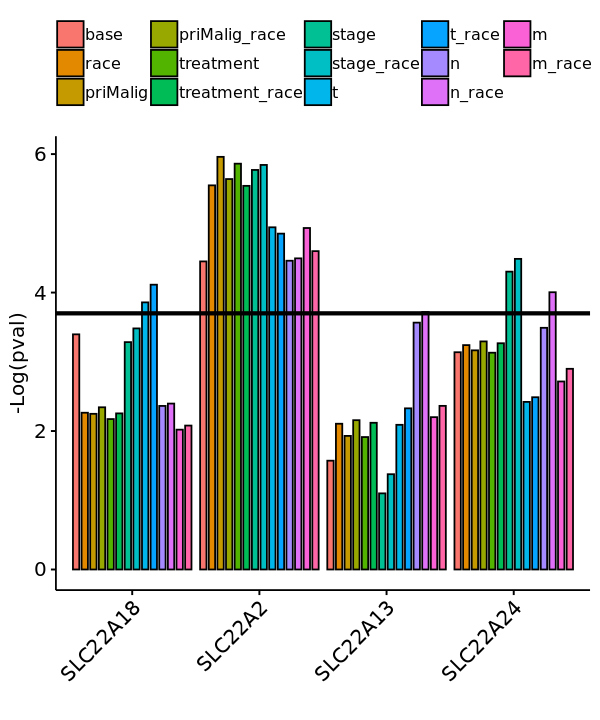

In [39]:
KIRP_coxph.bygene.df <- do.call(rbind.data.frame, lapply(1:length(KIRP_coxph.bygene), function(x) {
    cbind.data.frame(KIRP_coxph.bygene[[x]], rep(names(KIRP_coxph.bygene)[x], Gene=nrow(KIRP_coxph.bygene[[x]])))
}))
colnames(KIRP_coxph.bygene.df)[8] <- c("Gene")
KIRP_coxph.bygene.df.filt <- KIRP_coxph.bygene.df[!KIRP_coxph.bygene.df$Gene %in% c("SLC22A18AS", "SLC22A20P"),]
KIRP_coxph.bygene.df.filt$padj <- p.adjust(KIRP_coxph.bygene.df.filt$pval, method="BH")
KIRP_coxph.bygene.df.filt$negLog.padj <- -log(KIRP_coxph.bygene.df.filt$padj,10)

KIRP_w_filt <- unique(KIRP_coxph.bygene.df.filt$Gene[KIRP_coxph.bygene.df.filt$negLog.pval > 3.6])
KIRP_coxph.bygene.df.filt2 <- KIRP_coxph.bygene.df.filt[KIRP_coxph.bygene.df.filt$Gene %in% KIRP_w_filt,]
KIRP_coxph.bygene.df.filt2$comp <- factor(as.character(KIRP_coxph.bygene.df.filt2$comp), levels=c(
"base", "race", "priMalig", "priMalig_race", "treatment", "treatment_race", "stage", "stage_race", "t", "t_race", 
    "n", "n_race", "m", "m_race"))
options(repr.plot.width=5, repr.plot.height=6)
#pdf(file="KIRP_SLC22_coxph_analysis_summary_barplot_04272022.pdf", width=10, height=8)
ggbarplot(KIRP_coxph.bygene.df.filt2, x="Gene", y="negLog.pval", fill="comp", xlab="", ylab="-Log(pval)",
          position = position_dodge()) + theme(legend.title=element_text(size=0)) + 
          theme(axis.text.x = element_text(angle = 45, hjust = 1)) + geom_abline(slope = 0, intercept = 3.7, lwd=1.2)
#dev.off()


KIRP_coxph.bygene.df.filt.spl <- split(KIRP_coxph.bygene.df.filt, KIRP_coxph.bygene.df.filt$Gene)
KIRP_coxph.bygene.df.max <- do.call(rbind.data.frame, lapply(KIRP_coxph.bygene.df.filt.spl, function(x) {
    x[which(x$negLog.pval ==max(x$negLog.pval)),]
}))


Warning message in .get_data(model, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”
Warning message in .get_data(model, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


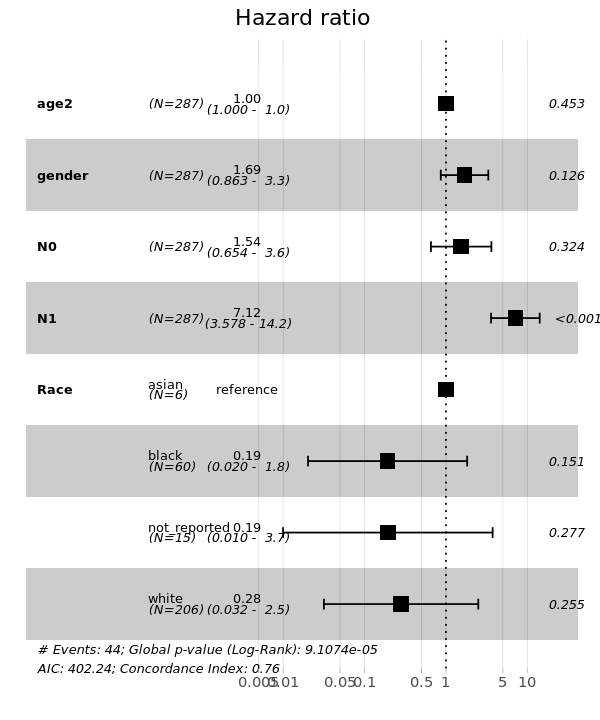

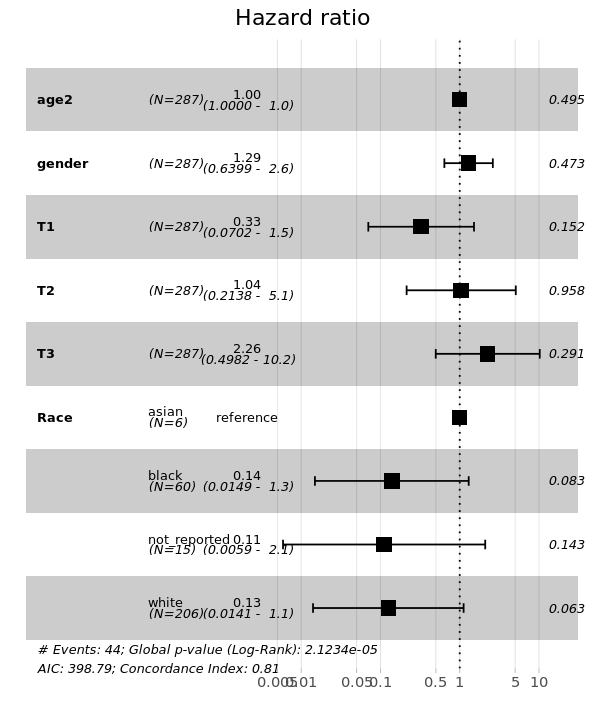

In [43]:
# KIRP - Optimal Cox PH model using SLC22A13
KIRP_surv_inp.n_race <- subset(KIRP_surv_inp, Race != "indig")
KIRP_surv_inp.n_race$Race <- droplevels(KIRP_surv_inp.n_race$Race)

KIRP_coxph.out_treatment_n_race_nogene <- summary(coxph(Surv(time, status) ~age2 + gender + N0 + N1 + Race, data=KIRP_surv_inp.n_race))
KIRP_coxph.mod_treatment_n_race_nogene <- coxph(Surv(time, status) ~age2 + gender + N0 + N1 + Race, data=KIRP_surv_inp.n_race)

ggforest(KIRP_coxph.mod_treatment_n_race_nogene)

# KIRP - Optimal Cox PH model using SLC22A18
KIRP_surv_inp.t_race <- subset(KIRP_surv_inp, Race != "indig")
KIRP_surv_inp.t_race$Race <- droplevels(KIRP_surv_inp.t_race$Race)

KIRP_coxph.out_treatment_t_race_nogene <- summary(coxph(Surv(time, status) ~age2 + gender + T1 + T2 + T3 + Race, data=KIRP_surv_inp.t_race))
KIRP_coxph.mod_treatment_t_race_nogene <- coxph(Surv(time, status) ~age2 + gender + T1 + T2 + T3 + Race, data=KIRP_surv_inp.t_race)

ggforest(KIRP_coxph.mod_treatment_t_race_nogene)


In [37]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.2 LTS

Matrix products: default
BLAS/LAPACK: /home/ubuntu/anaconda3/lib/libmkl_rt.so.1

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] gplots_3.1.1         survminer_0.4.9      survival_3.2-13     
 [4] ggpubr_0.4.0         ggplot2_3.3.5        dplyr_1.0.7         
 [7] limma_3.46.0         org.Hs.eg.db_3.12.0  AnnotationDbi_1.52.0
[10] IRanges_2.24.1       S4Vectors_0.28.1     Biobase_2.50.0      
[13] BiocGenerics_0.36.1 

loaded via a namespace (and not attached):
 [1] tidyr_1.1.4  